<a href="https://colab.research.google.com/github/LorenzoParma2000/MGT-502-Data-Science-and-Machine-Learning/blob/main/Group_project_Happiness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 60.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 60.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 2.0 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19579 sha256=45e642079215e4e4966d05621c27054348367dcabfc0bbb58cec69cb3ee6fe78
  Stored in directory: /root/.cache/pip/wheels/f2/ed/dd/d3a556ad245ef9dc570c6bcd2f22886d17b0b408dd3bbb9ac3
Successfully built validators


In [ ]:
import numpy as np
import pandas as pd
import folium
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats
import random
import matplotlib.patches as mpatches
import matplotlib.cm as cm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score, mean_absolute_error
#import streamlit as st
from scipy.cluster.hierarchy import fcluster, dendrogram, linkage
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.cluster import AgglomerativeClustering
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from pprint import pprint
from sklearn import ensemble
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.inspection import permutation_importance
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics.pairwise import pairwise_kernels
from tabulate import tabulate
from sklearn.model_selection import train_test_split # Splitting the data set
from sklearn.preprocessing import MinMaxScaler       # Normalization
from sklearn.preprocessing import StandardScaler       # Normalization

import torch                                   # PyTorch
import torch.nn as nn        

import streamlit as st
import tensorflow as tf
from tensorflow import keras

# A philosophical introduction

The question that this research seeks to answer is the following: "What makes us happy?". Nothing will set the tone better for this analysis than a thought-provoking quote from American writer William Seward Burroughs II, which stated that "Happiness is a byproduct of function, purpose, and conflict; those who seek happiness for itself seek victory without war."

The statement suggests that happiness is not a destination in itself, but rather a byproduct of living a fulfilling and purposeful life, where one faces and overcomes challenges, and achieves a sense of accomplishment and satisfaction in doing so.







The topic of happiness has been a subject of philosophical discussion for an extensive period of time. Throughout history, various philosophers, such as Aristotle and Immanuel Kant, have presented their own definitions and theories on what constitutes happiness. 

The study of happiness has expanded to include scientific inquiry, leading to an increased number of scientific scholars and researchers exploring the subject. Psychology, neuroscience, and economics have all been increasingly devoted to investigate the factors that contribute to happiness and overall well-being.

With these considerations in mind, the objective of this study is to develop Machine Learning algorithms that can accurately predict the happiness score of a country. To achieve this, the study will commence with a brief review of recent literature and will then build upon these insights by analyzing the **2016 world metrics dataset**. This dataset includes data from reputable sources such as the World Health Organization, Global Ecological Footprint, Human Freedom Index, and World Happiness Report.

The measurement of happiness scores and rankings relies on data gathered from the Gallup World Poll, which includes responses to the primary life evaluation question. Referred to as the Cantril ladder, this question prompts individuals to imagine a ladder where 10 represents the best possible life for them and 0 represents the worst possible life, asking them to rate their own present lives on this scale.

The paper will perform an analysis of the data, try to find common patterns of happiness among countries draw meaningful conclusions, bridging the gap between philosophical discussions and scientific inquiry on happiness.


# Literature Review

We acknowledge that the literature of happiness and well-being is immense. To align this work with curriculum of the MSc Sustainable Management & Technology (of which the authors are part of), this paper will analyze the relationship between happiness and SDGs across countries.

We try to address a research gap regarding the relationship between happiness and sustainability, which has received less attention compared to, for example, the link between happiness and consumption (Fabio & Kenny, 2018). Defining sustainability in a social context has been a challenge, leading to this gap. The focus on sustainability has always been on the well-being of nations throughout history. 

We argue that happiness (which, for a lot of people, is the ultimate goal in life) is **the result** of a collective effort of a Nation to achieve the 17 sustainable development goals created by the United Nations. While the SDGs do not explicitly mention happiness as a goal or target, many of the goals are directly related to promoting well-being and elevating societies.

Decoupling which specific SDGs lead to overall happiness is not an easy task, as cultural differences such as values and priorities can vary across nations and time. The pursuit of SDGs can indirectly lead to conditions in which individuals and groups can thrive (similar to a byproduct of function in Burroughs' words), ultimately increasing their overall levels of happiness and well-being.

In the literature review, we did not analyze different algorithms' performance in the task of happiness prediction. We dediced to remain more high level and discuss the work that has been done in the area of SDGs and its relationship to happiness.

### SDG and Happiness


We propose that investing in social welfare programs is a crucial aspect of the SDGs, particularly in diminishing poverty and inequality (SDG 1 and 10), promoting good health and well-being (SDG 3), and establishing robust institutions (SDG 16).

An important work from Iriarte (2022) shows a positive correlation between subjective well-being, SDGs index, and environmental indicators. The author discuss the need to decouple well-being levels from consumption levels and promote more conscious societies by encouraging intrinsic values and mindfulness.


The aim of promoting sustainable development is to enhance the standard of living for individuals across the globe (Aksoi & Arli, 2019). In their study, the authors seeked to address relevant questions related to SDGs, such as:
- Is there a correlation between economic freedom and increased levels of happiness?
- Aside from the effects on human health, do environmental impacts have a direct influence on happiness?
- Can social sustainability contribute to overall societal satisfaction and happiness?

The analysis performed by the authors revealed that sustainable happiness is positively correlated with the environmental dimension of sustainable development. In addition, the study found that enhancing social sustainability has a positive impact on happiness. However, no statistically significant correlations were found between the economic dimension and sustainable happiness.
The authors' work confirmed previous research and highlighted the need to prioritize sustainable development for achieving happiness. The results suggest that countries should focus on environmental policies to promote sustainable happiness, as supported by Dietz & Jorgenson (2014). Their study found that social sustainability has a positive impact on  happiness, as equality is linked to social justice and a trustworthy society, as found in previous research (Hellström, Hämäläinen, Lahti, Cook, & Jousilahti, 2015).


Sameer et al. (2021) investigated the connection between happiness, consumption, sustainability, and responsible behavior, building on previous research linking responsibility and happiness (Aman et al., 2019). They discovered a positive and significant association between these factors, contradicting the conventional belief that happiness and sustainability are unrelated. Instead, the results suggest that they are complementary, with happy nations exhibiting higher levels of responsibility towards both society and the environment. The study emphasizes the potential social and political implications of these findings, highlighting the significance of happiness in promoting responsible behavior. This aligns with the notion that a psychological condition like happiness can drive a society's tendency towards sustainability for the future.


In line with SDG 11, Chen (2023) explores the relationship between smart cities and urban happiness, emphasizing the need for effective integration of human well-being, social landscapes, and the built environment to create sustainable living. The study reveals that a smart environment, including green spaces, air pollution control, and recycling services, significantly influences happiness. 

Research suggests that sustainable happiness is positively correlated with the environmental and social dimensions of sustainable development, with a need to prioritize environmental policies to achieve sustainable happiness.










### Happiness across countries

The World Happiness Report (WHR) is a publication that contains articles and rankings of national happiness  provided by the Sustainable Development Solutions Network, a global initiative of the United Nations. The report ranks 149 countries based on their citizens' self-reported happiness levels, and also analyzes the factors that contribute to happiness and well-being.

The top five happiest countries in 2023 are Finland, Denmark, Switzerland, Iceland, and the Netherlands. The report finds that these countries share a number of key characteristics, including high levels of social trust, strong social support networks, and high levels of freedom and autonomy.

The report also identifies several factors that contribute to global declines in happiness, including the COVID-19 pandemic, climate change, and economic inequality. The report argues that policymakers need to take a more holistic approach to promote happiness and well-being, focusing on areas such as mental health, social connections, and environmental sustainability.

According to a study published in the Journal of Community Psychology, social justice is the second predictor of people's happiness, following social capital. The study, conducted by Isaac Prilleltensky and Salvatore Di Martino, surveyed 170,000 people in 28 countries from 2008 to 2017 using the Social Justice Index. The results indicated that countries like Denmark, Finland, and Sweden ranked high with social justice due to their social welfare programs. This correlates with the consistent high ranking of Nordic countries in the UN's World Happiness Report for the past four years. Overall, past research notes that institutions, rather than culture, are best able to predict happiness on a national level. Nordic countries' extensive welfare, free kindergarten, and healthcare programs provide a social safety net that allows citizens to trust society to take care of them if something goes wrong in their life. Additionally, Nordic people enjoy the world's least press censorship and corruption, resulting in high-quality democratic institutions and a confident citizenry that their vote matters. Governments should prioritize ensuring citizens' happiness rather than relying on gross domestic product as a shorthand for success, and investing in social welfare programs may lead to long-term benefits for society.




The primary objective of this study is to utilize a range of variables to accurately predict happiness scores and explore the intricate connection between happiness and environmental footprint across diverse countries.






# Data exploration


First, we needed to import the dataset and study the different variables contained in it. As we can notice from the table below, the dataset is composed by 137 countries and 30 variables. In particular, 'happiness_score' is the focus of this research (the *y* variable).

In [ ]:
#import the sataset
url = 'https://raw.githubusercontent.com/SimMigeotte/Machine_learning/main/2016_world_metrics.csv'
df = pd.read_csv(url) 
display(df) 

,country,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,bmi,basic_water,pop_mils,...,pf_identity,pf_score,ef_government,ef_legal,ef_money,ef_trade,ef_regulation,ef_score,hf_score,happiness_score
0,Angola,62.63262,17.34829,237.96940,0.057900,0.007520,5.38006,23.3,55.08428,20.82,...,7.500000,6.111324,6.496685,2.963635,5.606605,5.264754,5.518500,5.17,5.640662,3.866
1,Burundi,60.09811,16.59126,290.18580,0.052420,0.006450,3.88586,21.7,60.20415,9.85,...,5.833333,4.414134,6.115441,3.495487,7.585471,6.110770,6.271879,5.92,5.167067,2.905
2,Benin,61.08568,17.20543,242.37410,0.066690,0.009390,1.46034,23.5,66.32024,10.05,...,10.000000,7.496976,6.182575,3.822761,7.013885,6.026546,6.855929,5.98,6.738488,3.484
3,Burkina Faso,60.32101,15.48575,254.60270,0.055795,0.008635,7.10585,22.2,48.26772,16.46,...,10.000000,7.455340,5.405462,3.687657,7.121434,6.604145,7.427554,6.05,6.752670,3.739
4,Botswana,66.05297,17.42258,249.24130,0.032560,0.002040,5.14197,24.3,89.40444,2.00,...,4.250000,6.876334,6.702038,5.950516,9.056783,7.679525,7.769777,7.43,7.153167,3.974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,New Zealand,82.24739,25.29202,66.05728,0.003975,0.000235,9.01749,28.0,100.00000,4.46,...,9.250000,9.284819,6.476854,8.715280,9.455372,8.635971,9.159782,8.49,8.887410,7.334
133,Japan,84.16616,26.39402,50.82619,0.001980,0.000195,6.81588,22.7,98.97000,127.25,...,9.250000,8.733771,4.535268,7.586987,9.524659,7.495839,8.197000,7.47,8.101885,5.921
134,Cambodia,69.36723,17.36710,170.49700,0.027600,0.001110,3.50125,22.2,76.94537,14.86,...,8.333333,7.238448,7.897867,4.277907,9.308534,7.324052,7.061529,7.17,7.204224,3.907
135,South Korea,82.66409,25.26966,60.81405,0.002955,0.000125,8.68600,23.8,99.67540,49.00,...,9.250000,8.766350,6.826429,6.391154,9.609132,7.569457,7.243194,7.53,8.148175,5.835


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             137 non-null    object 
 1   life_expect         137 non-null    float64
 2   life_exp60          137 non-null    float64
 3   adult_mortality     137 non-null    float64
 4   infant_mort         137 non-null    float64
 5   age1-4mort          137 non-null    float64
 6   alcohol             137 non-null    float64
 7   bmi                 137 non-null    float64
 8   basic_water         137 non-null    float64
 9   pop_mils            137 non-null    float64
 10  development_index   137 non-null    float64
 11  gdp_per_capita      137 non-null    float64
 12  eco_footprint       137 non-null    float64
 13  biocapacity         137 non-null    float64
 14  deficit_or_reserve  137 non-null    float64
 15  pf_rol              137 non-null    float64
 16  pf_ss   

No missing values and only one pandas object type of data. The rest of the variables are floats.

  The variables in our dataset represent:
* country	-> country name	object	
* life_expect	-> Life expectancy at birth (years)
* life_exp60 ->	Life expectancy at age 60 (years)	
* adult_mortality ->	Adult (15 to 60 years) mortality Rates -> (per 1000 population)	
* infant_mort ->	Death rate up to age 1
* age1-4mort ->	Death rate between ages 1 and 4
* alcohol ->	Alcohol consumption per capita (15+, in litres of pure alcohol)	
* bmi ->	Mean BMI (kg/m^2) (18+, age-standardized estimate)	
* basic_water ->	Population using at least basic drinking-water services
* pop_mils ->	Population (millions)	
* development_index	-> Human Development Index	
* gdp_per_capita ->	Gross Domestic Product (GDP) per capita (dollars)	
* eco_footprint ->	Use of ecological assets (measured in gha per person)	
* biocapacity ->	Productivity of ecological assets (measured in gha per person)	
* defecit_or_reserve ->	Biocapacity Deficit or Reserve (measured in gha per person)	
* pf_rol ->	Personal Freedom score (Rule of Law)	
* pf_ss ->	Personal Freedom score (Security and Safety)
* pf_movement	-> Personal Freedom score (Movement)	
* pf_religion	-> Personal Freedom score (Religion)	
* pf_expression	-> Personal Freedom score (Expression and Information)	
* pf_identity ->	Personal Freedom score (Identity and Relationships)	
* pf_score ->	General Personal Freedom score	
* ef_government	-> Economic Freedom score (Size of Government)
* ef_legal ->	Economic Freedom score (Legal System and Property Rights)	
* ef_money ->	Economic Freedom score (Access to Sound Money)
* ef_trade ->	Economic Freedom score (Freedom to Trade Internationally)	
* ef_regulation ->	Economic Freedom score (Regulation of Credit, Labor, and Business)	
* ef_score ->	General Economic Freedom score
* hf_score ->	General Human Freedom score	
* happiness_score	Ladder score (between 10 (best) and 0 (worst) possible life)

## Data cleaning

Before starting with our research, it is necessary to check whether the dataset is clean. Indeed, we already checked that the dataset does not contain nans. Now we need check for duplicates and outliers.

In [ ]:
duplicates = df[df.duplicated()]
duplicates

,country,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,bmi,basic_water,pop_mils,...,pf_identity,pf_score,ef_government,ef_legal,ef_money,ef_trade,ef_regulation,ef_score,hf_score,happiness_score


The dataset does not contain any duplicates.

In [ ]:
df.describe()

,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,bmi,basic_water,pop_mils,development_index,...,pf_identity,pf_score,ef_government,ef_legal,ef_money,ef_trade,ef_regulation,ef_score,hf_score,happiness_score
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000
mean,72.962743,20.262010,150.254420,0.021038,0.001848,5.167943,25.525547,88.432938,49.495737,0.704919,...,7.034063,7.054373,6.506282,5.235571,8.352036,7.072647,6.997985,6.832847,6.943610,5.416920
std,7.307447,3.026119,78.374564,0.020495,0.002789,3.803661,2.064334,15.825358,163.299515,0.155286,...,2.968634,1.418618,1.225005,1.530037,1.377262,1.156196,1.007888,0.876275,1.044965,1.124471
min,53.130500,13.349510,49.201850,0.001790,0.000070,0.000910,20.600000,38.852590,0.520000,0.340000,...,0.000000,3.116028,3.616782,2.002915,1.942101,3.281311,2.483540,2.880000,4.200724,2.905000
25%,68.039250,17.609330,87.429160,0.005000,0.000240,1.619590,23.800000,82.800580,4.800000,0.590000,...,5.000000,6.059028,5.664386,4.030095,7.258295,6.355515,6.475280,6.290000,6.274969,4.459000
50%,74.843090,20.117140,135.341100,0.013175,0.000545,4.538300,26.200000,95.992400,10.880000,0.730000,...,8.000000,6.920446,6.576430,5.071814,8.971846,7.217833,7.058349,6.950000,6.848010,5.303000
75%,77.762060,22.390870,194.952800,0.032560,0.002235,8.100000,26.900000,99.586750,36.350000,0.830000,...,9.250000,8.216035,7.430474,6.158069,9.432830,8.050141,7.632668,7.490000,7.811560,6.324000
max,84.166160,26.394020,388.805700,0.090800,0.014615,15.950260,29.600000,100.000000,1408.040000,0.940000,...,10.000000,9.398842,9.528485,8.798181,9.922187,9.291177,9.159782,8.840000,8.887410,7.526000


The scales of the variables greatly differ, as the variables represent largely different characteristics. Nevertheless, If we focus on the last column, which describes the happiness score, we can see that the mean and the median are respectively 5,42 and 5,3. Very small difference that approximate nicely a normally shaped distribution for our outcome variable
This small difference would entail a slighly positive skewness, which we displayed later on in this paragraph. 

In [ ]:
# Calculate the Z-score
z_scores = stats.zscore(df[['life_expect', 'life_exp60', 'adult_mortality', 'infant_mort', 'age1-4mort', 
                            'alcohol', 'bmi', 'basic_water', 'pop_mils', 'development_index', 'gdp_per_capita', 
                            'eco_footprint', 'biocapacity', 'deficit_or_reserve', 'pf_rol', 'pf_ss', 'pf_movement',
                            'pf_religion', 'pf_expression', 'pf_identity', 'pf_score', 'ef_government', 'ef_legal', 
                            'ef_money', 'ef_trade', 'ef_regulation', 'ef_score', 'hf_score', 'happiness_score']], nan_policy='omit')

# Select the outliers
outliers = df[['life_expect', 'life_exp60', 'adult_mortality', 'infant_mort', 'age1-4mort', 
                            'alcohol', 'bmi', 'basic_water', 'pop_mils', 'development_index', 'gdp_per_capita', 
                            'eco_footprint', 'biocapacity', 'deficit_or_reserve', 'pf_rol', 'pf_ss', 'pf_movement',
                            'pf_religion', 'pf_expression', 'pf_identity', 'pf_score', 'ef_government', 'ef_legal', 
                            'ef_money', 'ef_trade', 'ef_regulation', 'ef_score', 'hf_score', 'happiness_score']][abs(z_scores) > 3]

# Print the outliers and their country names
for col in outliers.columns:
    for index, value in outliers[col][abs(z_scores[col]) > 3].items():
        if not pd.isna(value):
            print("Outlier:", value, "\nColumn:", col, "\nCountry:", df.loc[index, 'country'], "\n")


Outlier: 388.8057 
Column: adult_mortality 
Country: Sierra Leone 

Outlier: 0.0908 
Column: infant_mort 
Country: Sierra Leone 

Outlier: 0.014615 
Column: age1-4mort 
Country: Chad 

Outlier: 0.0110599999999999 
Column: age1-4mort 
Country: Niger 

Outlier: 0.010275 
Column: age1-4mort 
Country: Nigeria 

Outlier: 0.011805 
Column: age1-4mort 
Country: Mali 

Outlier: 38.85259 
Column: basic_water 
Country: Chad 

Outlier: 40.04142 
Column: basic_water 
Country: Ethiopia 

Outlier: 1236.69 
Column: pop_mils 
Country: India 

Outlier: 1408.04 
Column: pop_mils 
Country: China 

Outlier: 99431.5 
Column: gdp_per_capita 
Country: Qatar 

Outlier: 100172.0 
Column: gdp_per_capita 
Country: Norway 

Outlier: 114665.0 
Column: gdp_per_capita 
Country: Luxembourg 

Outlier: 88506.2 
Column: gdp_per_capita 
Country: Switzerland 

Outlier: 10.8 
Column: eco_footprint 
Country: Qatar 

Outlier: 15.82 
Column: eco_footprint 
Country: Luxembourg 

Outlier: 89.33 
Column: biocapacity 
Country: Su

We used a z-score greater than 3 to identify potential outliers. Above it is possible to check the 24 outliers,with the respective value, variable and country. Consequently, we draw the boxplot of those variables listed above to have a better understanding of the problem.

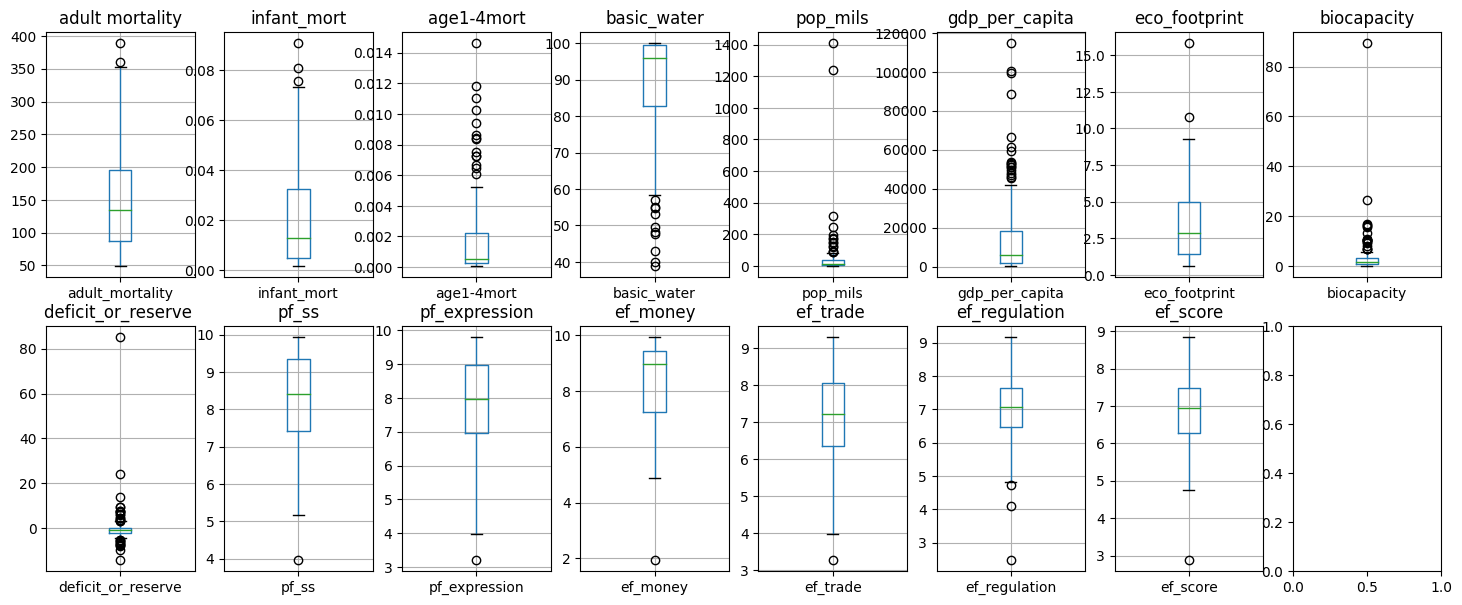

In [ ]:
# create subplots and plot the boxplots

fig, axes = plt.subplots(nrows=2, ncols=8, figsize=(18, 7))
df[['adult_mortality']].boxplot(ax=axes[0][0])
df[['infant_mort']].boxplot(ax=axes[0][1])
df[['age1-4mort']].boxplot(ax=axes[0][2])
df[['basic_water']].boxplot(ax=axes[0][3])
df[['pop_mils']].boxplot(ax=axes[0][4])
df[['gdp_per_capita']].boxplot(ax=axes[0][5])
df[['eco_footprint']].boxplot(ax=axes[0][6])
df[['biocapacity']].boxplot(ax=axes[0][7])
df[['deficit_or_reserve']].boxplot(ax=axes[1][0])
df[['pf_ss']].boxplot(ax=axes[1][1])
df[['pf_expression']].boxplot(ax=axes[1][2])
df[['ef_money']].boxplot(ax=axes[1][3])
df[['ef_trade']].boxplot(ax=axes[1][4])
df[['ef_regulation']].boxplot(ax=axes[1][5])
df[['ef_score']].boxplot(ax=axes[1][6])

# set the titles of the subplots
axes[0][0].set_title('adult mortality')
axes[0][1].set_title('infant_mort')
axes[0][2].set_title('age1-4mort')
axes[0][3].set_title('basic_water')
axes[0][4].set_title('pop_mils')
axes[0][5].set_title('gdp_per_capita')
axes[0][6].set_title('eco_footprint')
axes[0][7].set_title('biocapacity')
axes[1][0].set_title('deficit_or_reserve ')
axes[1][1].set_title('pf_ss')
axes[1][2].set_title('pf_expression')
axes[1][3].set_title('ef_money')
axes[1][4].set_title('ef_trade ')
axes[1][5].set_title('ef_regulation')
axes[1][6].set_title('ef_score')
# display the plots
plt.show()

From these boxplots it is possible to notice the different outliers. In order to decide on how to proceed and to understand whether these values are the result of typing errors we conducted some research. We found that these values are the true score of the countries in the different categories. For example, as far as the deficit_or_reserve and biocapacity variables are concerned, Suriname has the highest score in the dataset with 85.09 and 89.33 (Wikipedia A, 2023). Moreover, the footprint values of Qatar and Luxemburg are confirmed by some articles (Khatri Shabina , 2017), which also contain data about the outliers for the same countries in the gdp_per_capita variable. 

Given the low number of columns in our dataset we have decided to not remove the variables with z-scores larger than 3.

Moreover, later in the analysis, we will apply regression algorithms which are inherently robust to outliers in our dataset, such as:
- Decision Trees: non-parametric models that partition the data based on feature values. They are not influenced by the specific values of outliers and can handle them well.

- Random Forests: an ensemble of decision trees. They combine multiple decision trees to make predictions, which helps mitigate the impact of outliers.

- XGBoost Regression: an ensemble algorithm that combines multiple decision trees. The ensemble nature of XGBoost helps mitigate the impact of outliers by aggregating predictions from multiple trees, reducing the influence of individual outliers.

- Support Vector Regression (SVR): SVR aims to find a hyperplane that best fits the data while minimizing the margin violations. SVR is relatively robust to outliers because it focuses on the samples that lie closest to the decision boundary, known as support vectors. The model is less influenced by outliers that are farther away from the decision boundary, reducing their impact on the overall regression.

- Neural Networks (NN): Non-linear activation functions and weight sharing in neural networks help reduce the influence of outliers by allowing the network to learn more complex patterns and smooth out their impact.

The main problems with outliers will come when we deploy a basic Linear Regression, as it sensitive to outliers because it tries to minimize the sum of squared errors between the predicted values and the actual values. Outliers with large residual values can significantly affect the model's coefficients and overall fit. In that instance, we will apply regularization techniques to mitigate outliers' influence. Specifically: 

- Lasso Regression (L1 Regularization):

- - Lasso regularization adds a penalty term proportional to the absolute value of the coefficients (L1 norm) to the linear regression objective function. This penalty encourages sparse solutions by driving some coefficients to zero.
In the presence of outliers, the L1 penalty can shrink the coefficients of the outliers towards zero, effectively reducing their impact on the model. This can help make the regression model more robust to outliers.

- Ridge Regression (L2 Regularization):

- - Ridge regularization adds a penalty term proportional to the square of the coefficients (L2 norm) to the linear regression objective function. This penalty encourages small, but non-zero, coefficients.
While Ridge regression does not explicitly set coefficients to zero like Lasso, it can still help reduce the impact of outliers. 




## Dependent variable exploration

Now we focus on our dependent variable: Happiness. First, we plotted its distribution and, as anticipated, it shows a very small positive skewness, which indicates that the distribution is slightly skewed to the right. We are confident in stating that a skewness of 0.064 is not significant enough to greatly impact the interpretation of the data. No need to transform it. 

Skewness for happiness_score:
0.06497207442712431


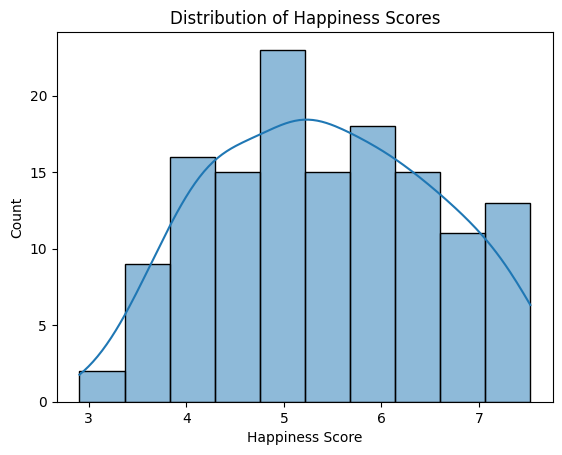

In [ ]:
#histogram and skewness
sns.histplot(data=df, x='happiness_score', bins=10
, kde=True)
plt.title('Distribution of Happiness Scores')
plt.xlabel('Happiness Score')
print("Skewness for happiness_score:")
print(df['happiness_score'].skew())

plt.show()

In [ ]:
df['happiness_score'].describe()

count    137.000000
mean       5.416920
std        1.124471
min        2.905000
25%        4.459000
50%        5.303000
75%        6.324000
max        7.526000
Name: happiness_score, dtype: float64

As a following step, we decided to plot an interactive map which indicates the happiness score of the different countries, which would also help us to have a better overview of which countries have been included and excluded from the dataset. To do so, we added a new variable to the dataset: iso3, which would help us plotting the map.

In [ ]:
#we want to add the iso3 code to our dataset 
url1 = 'https://data.apps.fao.org/catalog/dataset/b9b7e6a6-7466-4f17-b064-469691346583/resource/f1b4b92d-8abd-43be-bea3-c0dc7f82ccf9/download/iso3.csv'
df_iso3 = pd.read_csv(url1) 
df_iso3 = df_iso3.rename(columns={'name': 'country'})
merged_df = pd.merge(df, df_iso3, on='country', how='left')

column_name = 'iso3'
temp_col = merged_df.pop(column_name)
# Insert the column at position 2
merged_df.insert(1, column_name, temp_col)
#in order to know the missing iso3 values 
missing_iso3_df = merged_df[merged_df['iso3'].isna()]

replacement_dict = {
    'Tanzania': 'TZA',
    'DR Congo': 'COD',
    'Congo Republic': 'COG',
    'United States': 'USA',
    'Venezuela': 'VEN',
    'Bolivia': 'BOL',
    'Iran': 'IRN',
    'Turkey': 'TUR',
    'Russia': 'RUS',
    'Moldova': 'MDA',
    'Macedonia': 'MKD',
    'Kyrgyz Republic': 'KGZ',
    'Czech Republic': 'CZE',
    'Vietnam': 'VNM',
    'South Korea': 'KOR',
    'Laos': 'LAO',
}
# Replace NaN values in the relevant columns based on the country name
merged_df['iso3'] = merged_df['iso3'].fillna(df['country'].map(replacement_dict))
df = merged_df.copy()

In [ ]:
fig = go.Figure(data=go.Choropleth(
    locations = df['iso3'],
    z = df['happiness_score'].round(3),
    text = df['country'],
    colorscale = 'Blues',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'Happiness score',
))
fig.update_layout(
    title_text='Happiness score in 2016',
    geo=dict(
        showframe=True,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    margin=dict(l=20, r=20, t=60, b=20),
    annotations = [dict(
        x=0.5,
        y=0,    #Trying a negative number makes the caption disappear - I'd like the caption to be below the map
        xref='paper',
        yref='paper',
        text='Source: <a href="https://www.kaggle.com/code/dariasvasileva/merging-world-metrics-sets/output">\
            world_metrics</a>',
        showarrow = False
    )]
)

fig.show()

As the map shows, the countries included in the dataset are heterogeneus in terms of geographical positioning and GDP. Referring to the missing nations, it is possible to notice that many are or have recently either been in war, such as Yemen, Siria and Sudan or governed by a dictatorships or strong monarchies, such as North Korea, Turmekistan and Oman. Nevertheless, it is possible to recognize other missing countries that do not belong to the previous categorization, such as Uzbekistan, Papua New Guinea and Cuba.
Moreover, most of the happier scores are registered among western countries, with the highest scores in North America and Northern Europe. 

<ipython-input-13-d3c8807e82b7>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

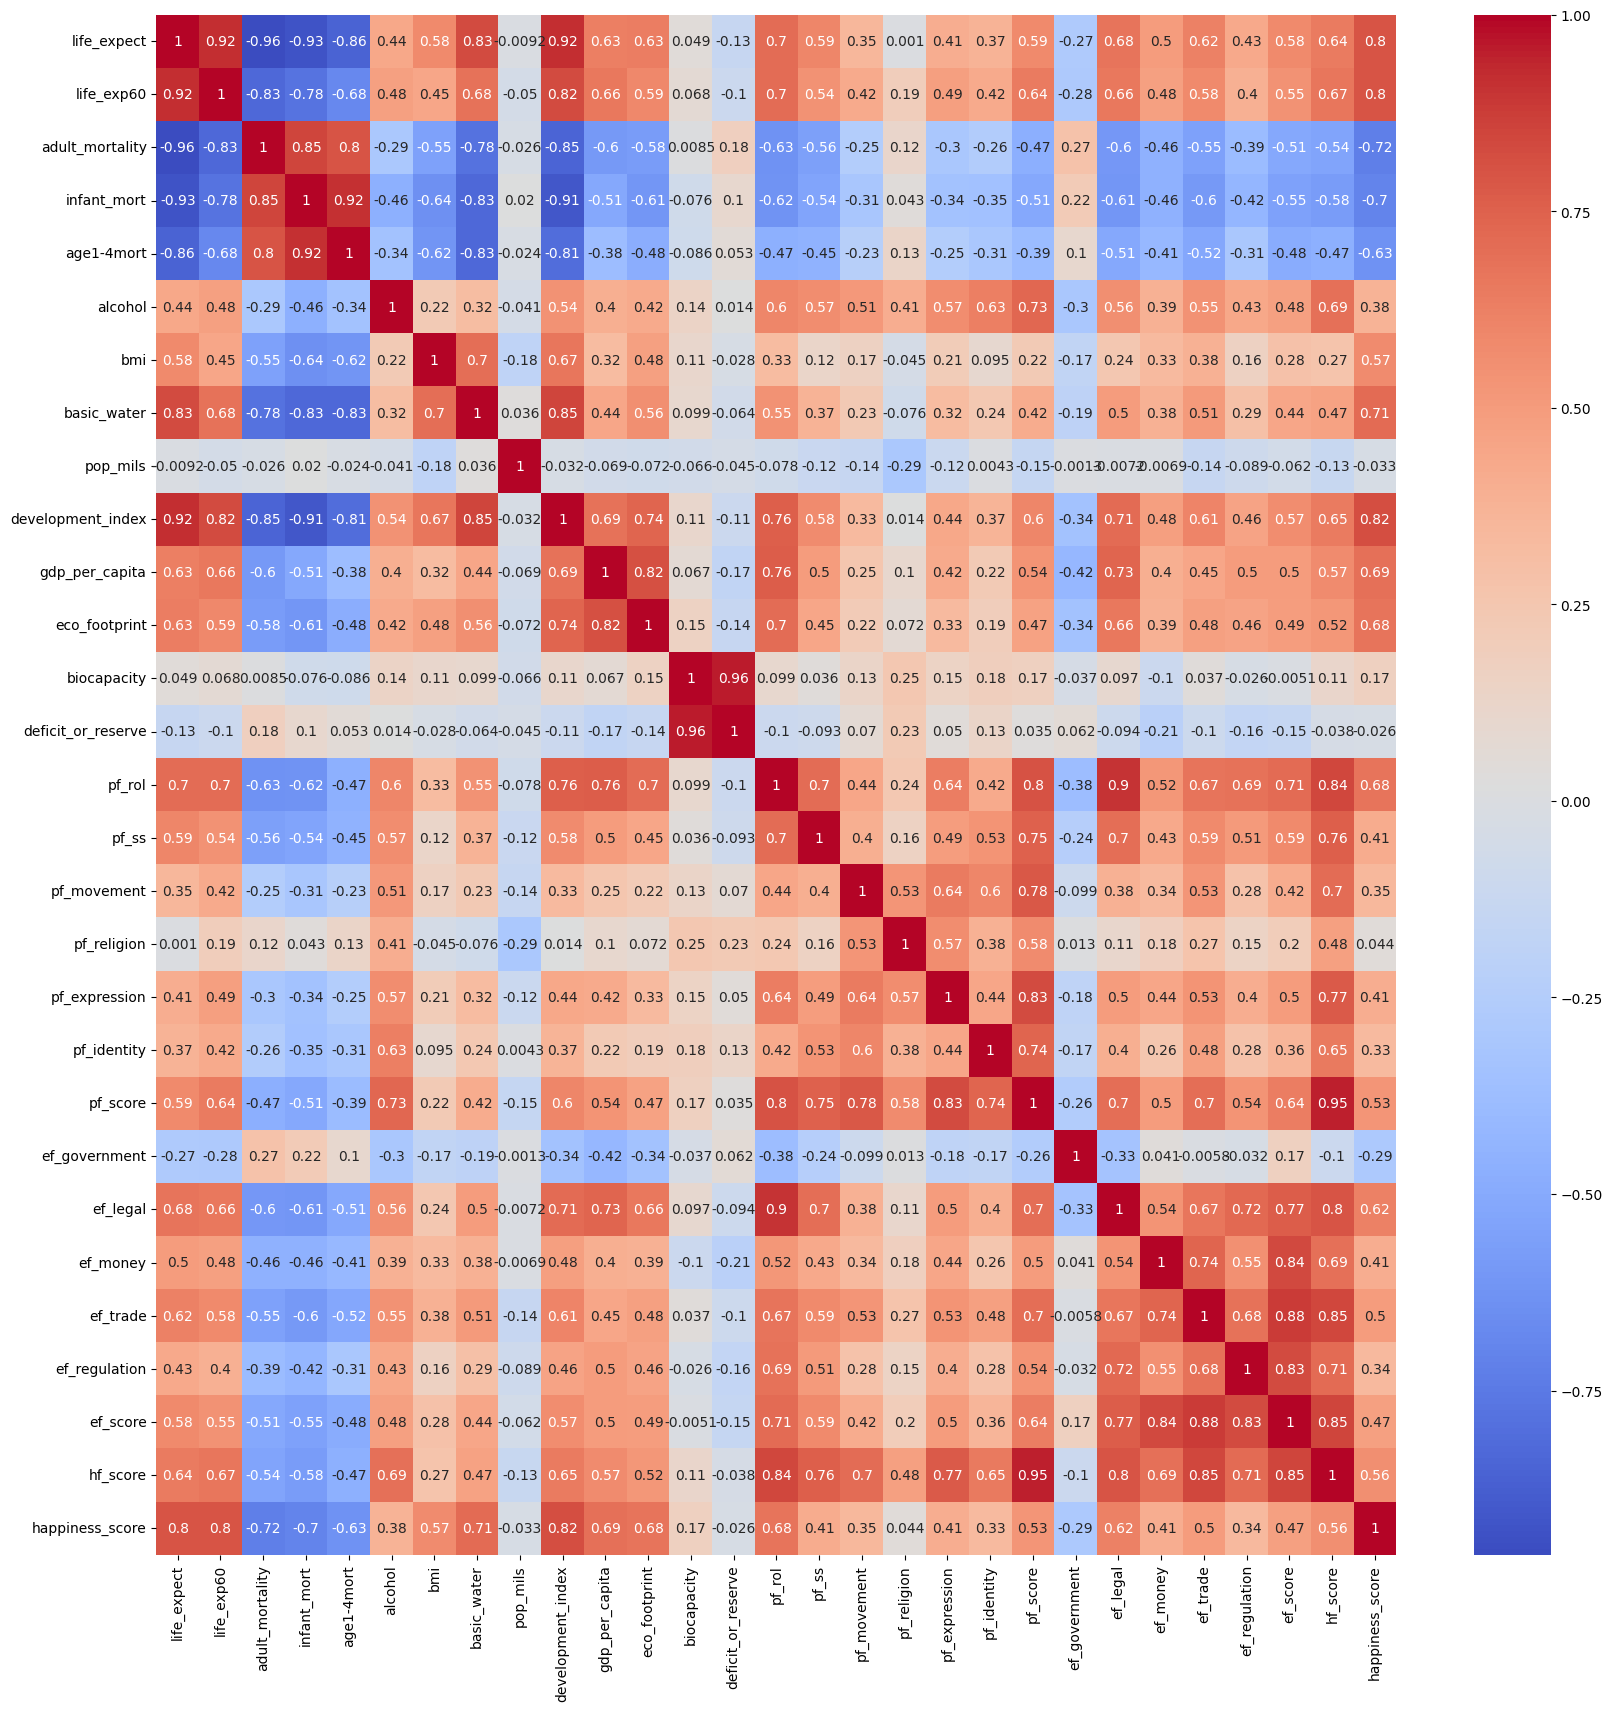

In [ ]:
#lets look at the correlation with the happiness score
# Compute the correlation matrix
corr = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap='coolwarm', annot=True)

Based on the correlation matrix analysis, the variables "life_expectancy" and "development index" exhibit a strong positive correlation with the "happiness_score," with correlation coefficients of 0.8 and 0.82, respectively. This finding suggests that higher levels of life expectancy and development index are associated with increased happiness.

Furthermore, the variables "deficit_or_reserve" and "biocapacity" demonstrate the highest correlation coefficient of 0.96. This result aligns with expectations as "biocapacity" represents the productivity of ecological assets, while "deficit_or_reserve" reflects the biocapacity deficit or reserve. The strong correlation between these variables indicates that changes in the biocapacity deficit or reserve are closely related to variations in biocapacity productivity.

The observed correlations can be explained through several mechanisms. Firstly, higher life expectancy is often associated with improved access to healthcare, better living conditions, and overall well-being, which are factors contributing to happiness. Similarly, a higher development index signifies a country's progress in terms of economic prosperity, education, and social well-being, which can positively influence happiness levels.

Regarding the correlation between "deficit_or_reserve" and "biocapacity," it is reasonable to expect a strong relationship. As biocapacity represents the ability of ecological assets to produce resources and absorb waste, a higher deficit or lower reserve indicates a potential imbalance between resource consumption and regeneration. This imbalance can have significant ecological and economic implications, which may impact overall well-being and, consequently, happiness.



# CLUSTERING ANALYSIS

We will perform an introductory clustering analysis to identify clusters of countries based on their happiness scores. We will use KMEANS and Hierarchical Clustering.

In the correlation table it was shown that **Ecological footprint** had a moderate, positive correlation with happiness. In light of this, we would like to cluster countries based on levels of happiness and ecology and analyze the geographical relationship of the two and be in line with our introductory discussion on SDGs and happiness.

We hypothesize that countries with higher ecological footprint values are likely to exhibit higher levels of happiness. By conducting a clustering analysis based on these variables, we aim to identify distinct groups of countries that exhibit similar patterns of ecological footprint and happiness. 

## KMEANS Clustering

We opted for the K-Means clustering algorithm for several reasons. Firstly, it is well-suited for handling numerical data and effectively identifying distinct groups of countries with similar happiness scores. Additionally, K-Means has the advantage of generating clusters with balanced sizes, which is desirable in order to facilitate easier interpretation and comparison of the clusters. Furthermore, the flat geometry feature of K-Means is highly relevant in the context of clustering countries based on their happiness score, given that happiness scores is represented as continuous numerical values.






In [ ]:
X_cluster0 = df.loc[:, ["eco_footprint","happiness_score"]]
X_cluster0.head()

,eco_footprint,happiness_score
0,0.93,3.866
1,0.80,2.905
2,1.41,3.484
3,1.21,3.739
4,3.83,3.974


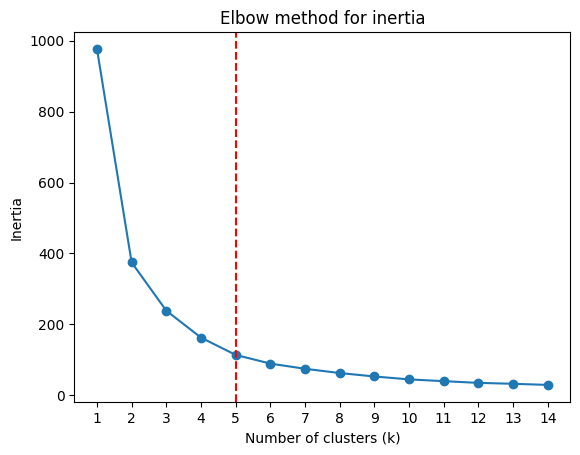

In [ ]:
n_init_value = 15
inertias = []
nbr_clusters = range(1, 15)

for i in nbr_clusters:
    km = KMeans(n_clusters=i, random_state=0, n_init=n_init_value).fit(X_cluster0)
    inertias.append(km.inertia_)


optimal_clusters = 5 #this was addedd later after noticing that 4 was the optimal number of clusters

# Plot
plt.plot(nbr_clusters, inertias, '-o')
plt.axvline(x=optimal_clusters, color='r', linestyle='--')  # Add vertical line
plt.xticks(nbr_clusters)
plt.title('Elbow method for inertia')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()


This graph above shows the optimal number of clusters for our model according to the elbow method. According to this technique we should select the number of cluster that leads to a significant change in inertia. The graph shows that between k = 4 and k = 5 we have a notable reduction in inertia, therefore 5 appears to be a reasonable number of clusters as, after that, the reduction in inertia is lower for a unit increase in the number of clusters. We can see this decision as a tradeoff between underfitting (when the clusters are insufficient) and overfitting (when the clusters are too many).

In [ ]:
# Create an instace of KMeans and specify the number of clusters=5, 
# Random state help make sure we all have exactly the same results
kmeans = KMeans(n_clusters=5, random_state=0, n_init='auto') 
kmeans.fit(X_cluster0)

KMeans(n_clusters=5, n_init='auto', random_state=0)

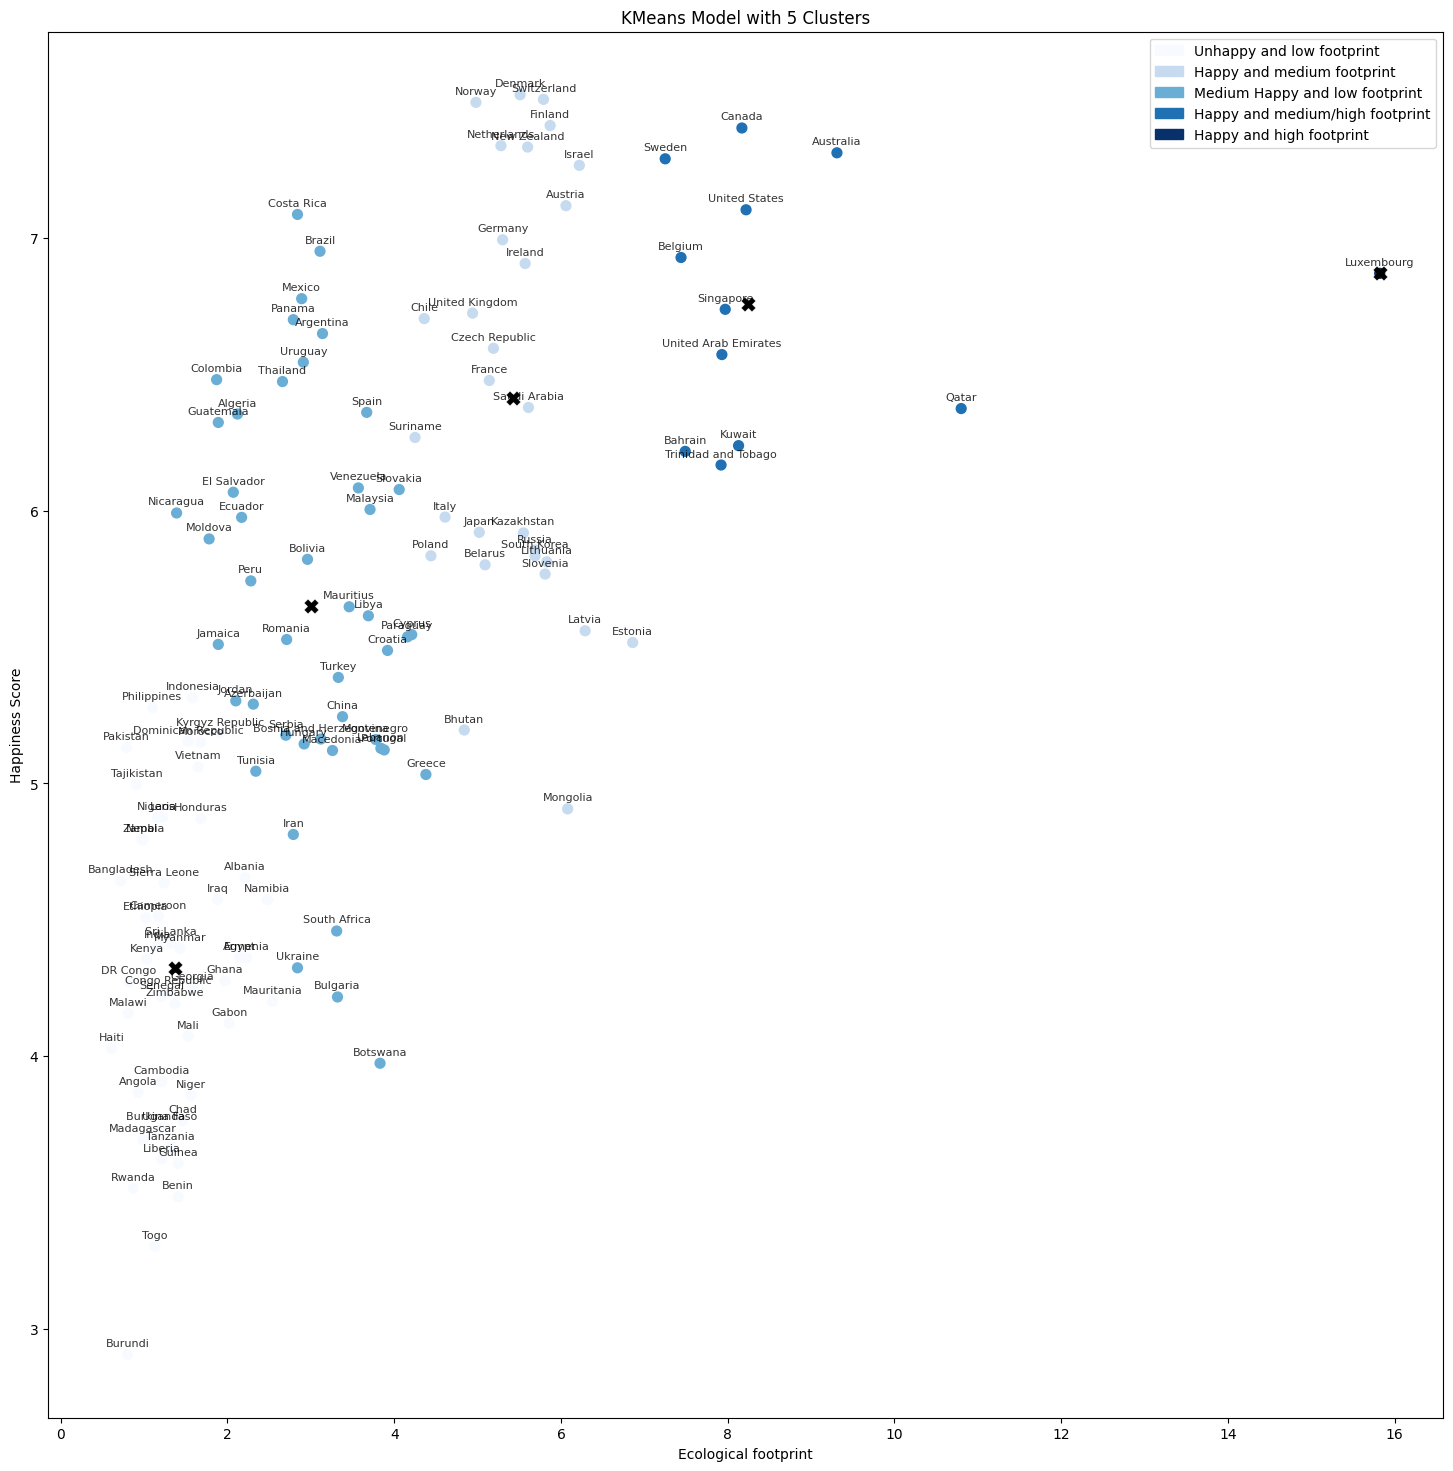

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(18, 18))
legend_labels = ["Unhappy and low footprint", "Happy and medium footprint", "Medium Happy and low footprint",
                 "Happy and medium/high footprint", "Happy and high footprint"]

# Increase marker size
scatter = ax.scatter(X_cluster0["eco_footprint"], 
                     X_cluster0["happiness_score"], 
                     c=kmeans.labels_,
                     cmap='Blues',  # Use 'Blues' colormap for shades of blue
                     s=50)  

# Add cluster centers
ax.scatter(kmeans.cluster_centers_[:, 0],
           kmeans.cluster_centers_[:, 1],
           marker='X', 
           color='black',  # Set color to black
           s=100, 
           linewidths=0.1)

# Add subset of country names for each cluster
for cluster_label in np.unique(kmeans.labels_):
    cluster_indices = np.where(kmeans.labels_ == cluster_label)[0]
    random_indices = random.sample(list(cluster_indices), int(1 * len(cluster_indices)))
    for i in random_indices:
        country_name = df.iloc[i]["country"] 
        ax.annotate(country_name, (X_cluster0["eco_footprint"][i], X_cluster0["happiness_score"][i]),
                     fontsize=8, color='black', alpha=0.8,
                     ha='center', va='center', xytext=(0, 8), textcoords='offset points')

ax.set_xlabel("Ecological footprint")
ax.set_ylabel("Happiness Score")
ax.set_title("KMeans Model with 5 Clusters")

legend_handles = []
for label, color in zip(legend_labels, plt.cm.Blues(np.linspace(0, 1, len(legend_labels)))):
    legend_handles.append(mpatches.Patch(color=color, label=label))

ax.legend(handles=legend_handles)

plt.show()


Using the elbow method, we clustered countries into five groups, recognizing that this approach is subjective. These clusters serve as an approximate classification of countries with similar characteristics, primarily focusing on their ecological footprint which can be seen on the graph. For example, Botswana and Norway are in the same cluster, indicating a similar ecological footprint, despite substantial variations in their happiness scores (due to their substantial differences in development). It should also be noted that Luxemburg is clustered on itself alone. It is because of its high ecological footprint. Luxembourg is a small country with a high population density, and it has a significant share of industrial and transportation emissions. 
In the following code we develop a world map in which nations are divided according to the clustering shown in the graph above.

In [ ]:
X_cluster0['cluster_labels'] = kmeans.predict(X_cluster0)
df_country= df.loc[:, ["eco_footprint","iso3","country"]]
X_cluster0 = X_cluster0.merge(df_country, on="eco_footprint",)

In [ ]:
cluster_legend = [
    'Unhappy and low footprint - Cluster 0',
    'Happy and very low footprint - Cluster 1',
    'Happy and medium/low footprint - Cluster 2',
    'Happy and medium/high footprint - Cluster 3',
    'Happy and high footprint - Cluster 4'
]

colors = ['rgb(247,251,255)', 'rgb(222,235,247)', 'rgb(198,219,239)', 'rgb(158,202,225)','rgb(30,98,189)']

fig = go.Figure()

fig.add_trace(go.Choropleth(
    locations=X_cluster0['iso3'],
    z=X_cluster0['cluster_labels'],
    text=X_cluster0['country'],
    colorscale=colors,
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=1,
    showscale=False,
    customdata=X_cluster0['cluster_labels'],
    hovertemplate="%{text}<br>Cluster: %{customdata}<extra></extra>"
))

# Add legend
for i, cluster in enumerate(cluster_legend):
    fig.add_trace(go.Scatter(
        x=[None],
        y=[None],
        mode='markers',
        marker=dict(
            size=15,
            color=colors[i],
            showscale=False
        ),
        name=cluster,
        showlegend=True,
        legendgroup="legend"
    ))

fig.update_layout(
    title_text='Clustering of Countries based on K-Means',
    geo=dict(
        showframe=True,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    margin=dict(l=20, r=20, t=60, b=20),
)

fig.update_layout(
    legend=dict(
        itemsizing='constant',
        tracegroupgap=0
    )
)
fig.show()


The world map graph provides a visually engaging representation of the distinct clusters. Cluster 0 demonstrates a strong association with Africa, where countries generally exhibit lower levels of happiness. Additionally, these countries tend to have significantly lower emission levels. In contrast, a majority of Western countries are associated with higher levels of happiness along with a higher ecological footprint. 
For instance, countries in Scandinavia are characterized by both high happiness levels and low emission levels, reflecting their commitment to sustainability, indicating an important point: this is not a tradeoff. On the other hand, countries like the U.S., while still experiencing happiness, exhibit higher ecological impacts compared to their Scandinavian counterparts. 
Sweden is the only country in Scandinavia to be in a cluster other than 1. In fact, it was assigned to medium/high emitting country. Indeed, if we see Sweden ecological footprint, it is rather high (7.25) as compared to, for example, Denmark (5.51).  Both countries nevertheless show very similar levels of happiness. Hence, cthe decisive factor in the assignment to a luster or the other was definetely the ecological impact (which for SWE is higher). 






We would like to reminder the reader that such clusters are subjective to interpretation and only provide a visual tool and should be interpreted with caution.

In this map, Cluster 4 (dark blue label) is hardly seen as it is only represented by Luxemburg. If we want to have a closer look at it, we can zoom in Europe

In [ ]:
cluster_legend = [
    'Unhappy and low footprint - Cluster 0',
    'Happy and very low footprint - Cluster 1',
    'Happy and medium/low footprint - Cluster 2',
    'Happy and medium/high footprint - Cluster 3',
    'Happy and high footprint - Cluster 4'
]

colors = ['rgb(247,251,255)', 'rgb(222,235,247)', 'rgb(198,219,239)', 'rgb(158,202,225)', 'rgb(30,98,189)']

fig = go.Figure()

fig.add_trace(go.Choropleth(
    locations=X_cluster0['iso3'],
    z=X_cluster0['cluster_labels'],
    text=X_cluster0['country'],
    colorscale=colors,
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=1,
    showscale=False,
    customdata=X_cluster0['cluster_labels'],
    hovertemplate="%{text}<br>Cluster: %{customdata}<extra></extra>"
))

# Add legend
for i, cluster in enumerate(cluster_legend):
    fig.add_trace(go.Scatter(
        x=[None],
        y=[None],
        mode='markers',
        marker=dict(
            size=15,
            color=colors[i],
            showscale=False
        ),
        name=cluster,
        showlegend=True,
        legendgroup="legend"
    ))

fig.update_layout(
    title_text='Clustering of Countries based on K-Means',
    geo=dict(
        showframe=False, 
        showcoastlines=False,
        projection_type='equirectangular',
        scope='europe' 
    ),
    margin=dict(l=20, r=20, t=60, b=20),
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),  # Remove the x-axis grid lines and tick labels
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)  # Remove the y-axis grid lines and tick labels
)

fig.update_layout(
    legend=dict(
        itemsizing='constant',
        tracegroupgap=0
    )
)

fig.show()

The updated visualization allows for better observation of regional variations within the European continent. Notably, smaller countries such as Belgium or Luxembourg exhibit higher footprints compared to the majority of countries in the region. This is largely due to the high density of the population.






In [ ]:
import streamlit as st
# Define a function for predicting the cluster
def predict_cluster(country, eco_footprint, happiness_score):
    # Prepare the input features for prediction
    features = np.array([[eco_footprint, happiness_score]])
    # Predict the cluster
    cluster_label = kmeans.predict(features)[0]
    return cluster_label

# Streamlit interface
st.title("Country Cluster Predictor")
st.write("Enter the details below to predict the cluster for a country.")

# Input fields for country and features
country = st.text_input("Enter the country:")
eco_footprint = st.number_input("Enter the ecological footprint:")
happiness_score = st.number_input("Enter the happiness score:")

# Perform prediction on button click
if st.button("Predict"):
    # Call the predict_cluster function
    predicted_cluster = predict_cluster(country, eco_footprint, happiness_score)
    st.write("Predicted Cluster:", predicted_cluster)

# Display the dataset
st.subheader("Dataset")
st.write(df)

2023-05-29 12:24:17.614 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/ipykernel_launcher.py [ARGUMENTS]


## Hierarchical Clustering


We will perform another clustering analysis on the happiness and ecological scores of countries in our dataframe, utilizing a different clustering algorithm. By employing this alternative approach, we aim at identifying clusters that may differ from the ones obtained through the previous K-means clustering. We will compare and comment on the dissimilarities between the results of the two clustering algorithms, highlighting any notable variations in the cluster assignments and the overall patterns observed in the relationship between happiness and ecological scores.

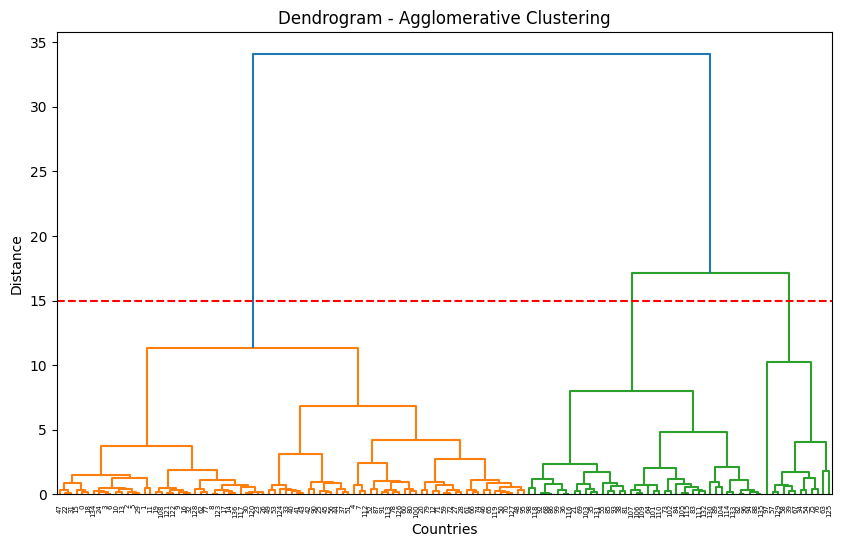

In [ ]:
X = df.loc[:, ["happiness_score", "eco_footprint"]]

linkage_matrix = linkage(X, method='ward')

# Plot the dendrogramr
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.title('Dendrogram - Agglomerative Clustering')
plt.xlabel('Countries')
plt.ylabel('Distance')
plt.axhline(y=15, color='red', linestyle='--')

plt.show()


After examining the dendrogram and observing noticeable gaps in distance between the vertical bars, we conclude that the optimal number of clusters is 3. This finding deviates from the elbow method utilized in KMeans clustering, which indicated a preferable number of 5 clusters.  The distinction may arise from the inherent dissimilarities between the two clustering algorithms and their respective interpretations of the data structure.






The horizontal line at y = 15 was drawn manually based on the analysis just provided.

In [ ]:
agglomerative = AgglomerativeClustering(n_clusters=3, linkage = 'ward')
agglomerative.fit(X)

AgglomerativeClustering(n_clusters=3)

In [ ]:
X['cluster_labels'] = agglomerative.labels_
df_country = df.loc[:, ["eco_footprint", "iso3", "country"]]
X = X.merge(df_country, on="eco_footprint")

In [ ]:
cluster_legend = [
    'Unhappy and low footprint - Cluster 0',
    'Happy and medium/low footprint - Cluster 1',
    'Happy and medium/high footprint - Cluster 2'
]

colors = ['rgb(247,251,255)', 'rgb(198,219,239)', 'rgb(30,98,189)']

fig = go.Figure()

fig.add_trace(go.Choropleth(
    locations=X['iso3'],
    z=X['cluster_labels'],
    text=X['country'],
    colorscale=[[0, colors[0]], [0.5, colors[1]], [1, colors[2]]],
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=1,
    showscale=False,
    customdata=X['cluster_labels'],
    hovertemplate="%{text}<br>Cluster: %{customdata}<extra></extra>"
))

# Add legend
for i, cluster in enumerate(cluster_legend):
    fig.add_trace(go.Scatter(
        x=[None],
        y=[None],
        mode='markers',
        marker=dict(
            size=15,
            color=colors[i],
            showscale=False
        ),
        name=cluster,
        showlegend=True,
        legendgroup="legend"
    ))

fig.update_layout(
    title_text='Clustering of Countries based on Hierarchical Clustering',
    geo=dict(
        showframe=True,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    margin=dict(l=20, r=20, t=60, b=20),
)

fig.update_layout(
    legend=dict(
        itemsizing='constant',
        tracegroupgap=0
    )
)
fig.show()

There are notable disparities between the outcomes of the two employed clustering algorithms. Firstly, contrary to the K-means algorithm, where five clusters were suggested, we opted to assign a more concise grouping of three clusters to countries based on their happiness and ecological scores.

China, which was previously categorized as "Happy and medium/low environmental footprint" under the K-means algorithm, is now placed in cluster 0, representing countries characterized as "unhappy" with a persistently low ecological footprint.

Of particular interest is the observation that Europe primarily comprises countries associated with the highest levels of pollution, as indicated by the clustering results. Notably, only Sweden (curiously placed in Cluster 3 by K-means) is now placed in cluster 1, denoting countries with a medium/low pollution level. Notwithstanding this shift, Sweden still clusters alongside the United States, Canada, and Australia.

One notable point of agreement between the two algorithms is the consistent assignment of African countries to cluster 0, signifying a commonality in perceiving them as part of the "unhappy" group.

These divergent outcomes shed light on the contrasting perspectives provided by the clustering algorithms and emphasize the need for careful consideration and interpretation of their results.

In the context of our analysis, we hold that the 5 clusters generated by the K-means algorithm provide a more comprehensive representation of regional disparities in terms of happiness and ecological scores compared to the case of 3 clusters. This belief is supported by the reasoning that a higher number of clusters allows for a finer granularity in capturing the diverse range of country characteristics within each region. 5 clusters should better capture the nuances and variations within regions, enabling a better understanding of the relationship between happiness, ecological scores, and geographical context.






# REGRESSION ANALYSIS

We are trying to predict the level of happiness in countries given a wide range of attributes. Given that our dependent variable is measured on a continuous scale, we are facing an instance of a regression problem. 

 Consequently, we will introduce the reader to a range of models, commencing with a baseline algorithm exemplified by Linear Regression, and progressing to Neural Networks. For each of the models we examine below, we will endeavor to enhance their performance by implementing optimized parameters or apply regularization techniques. The results of each model will be systematically reported in a common table which, progressively, will summarize all the tests conducted. 
We will compare the different regressors with default parameters **with their optimized counterpart**. Then, in the discussion part, we will extensively discuss the results and make **between** models' comparisons.
The final results table is composed of different columns which represent the metrics chosen to summarize the results. These are: R2, MAE, MSE and RMSE.

-  R2 encodes how much of the data variance is explained by the model, in other terms it indicates the proportion of the variance in the dependent variable Y that can be explained by the independent variables Xi. It is easy to interpret and widely used in the academic field, however it is sensible to outliers and to the inclusion and exclusion of independent variables. Nevertheless, it highly depends on the specific context in which it is used. Therefore, we decided to include it in our table only to study the improvements within models. It will not be used for comparison between models. 

- MAE, which stands for mean average error, is the average of the absolute differences between the actual and predicted values. It is more robust to outliers as it is based on the average error and allows to have a straighforward interpretation. We use this metric to compare different models, as well as to study the improvements of a single function.

- MSE is the mean squarred error and measures the average of the squares of the errors, that is the average squared difference between the estimated values and the actual value. As a direct consequence of its mathematical formulation it is considered to be quite accurate, in fact, it penalizes larger errors more than smaller errors due to the squaring. However, exactly for the same reason, it is sensitive to outliers, which may lead to misleading interpretation. Therefore, it is a useful metric that should be used together with other parameters such as MAE, as it is done in this case.

- RMSE measures the root mean squared error by taking the square root of MSE. While these metrics may be perceived as very similar, they still differ in terms of interpretability and sensibility to outliers. In fact, while MSE emphasizes the accuracy and relative magnitude of errors, RMSE provides is less sensible to outliers and provides an easily interpretable measure of the average deviation, expressed in the units of the dependent variable Y. Also, while R2 measures relative fit, the RMSE is an absolute measure of fit, providing an overall estimate of accuracy by computing the variance of the residuals and taking the square root. RMSE satisfies symmetry-in-dispersion, and it is useful when lower residual values of a prediction are preferred. 


##### Validation techniques

The first validation technique employed is Train/Test split. The training set (80% of observations) is used to train a model with the available data, and the test set (20%), consisting of unseen data, is used to evaluate the algorithm's performance. Theoretically, this indicates how the model behaves in real applications. This paper used such a validation technique for training and testing the model. Two datasets are created, the train used to fit the ML models and the test set to evaluate the fit. The second validation technique is Cross-Validation (CV), specifically a 5-fold CV applied for each model. Here the data is split into five-folds, with each fold acting as the test set. Each observation is used once in one of the test sets to reduce randomization bias because the data split is different in each of the five repetitions. CV aims to prevent model overfitting by splitting the dataset, using a portion of it to fit a model, and using the rest to evaluate performance. In this instance, the dataset is split into five parts, and the test error is computed by averaging test errors across the five trials. This process aims to train the model on multiple train-test splits to assess performance on unseen data. 

#### Hyperparameter Optimiziation

The most efficient hyperparameter combination is selected by defining a hyperparameter search space. This task is essential for optimizing the output of the ML models. Neglecting the algorithms’ tuning may result in suboptimal results, as the loss function is not minimized. Grid-Searches (GS) on hyper-parameters and 5-fold CV on the training set is employed for every algorithm. GS exhaustively computes combinations of hyperparameter tunings to detect an optimum setting for each different model. The validation techniques and the hyperparameter optimization are laid out visually in Figure 4. It constitutes the processing pipeline of this work. 

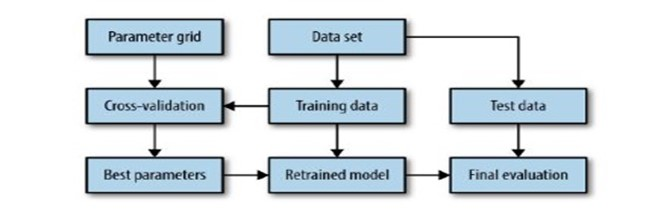

The dataset is initially split into train and test. The parameter grid, used to find the best-tuned parameters through CV, is used to retrain and retest the data. This should yield better performance, as it operates with the right combinations of hyperparameters to achieve improved prediction accuracy than in the case with no hyper tuning.

#### Preprocessing

Now we will perform some passages that will be needed for all the steps below. We start definig our X and Y variables and we continue splitting the data in train and test sets using the 20/80 rule described above.

In [ ]:
y = df['happiness_score']
X = df[['life_expect', 'life_exp60', 'adult_mortality',
       'infant_mort', 'age1-4mort', 'alcohol', 'bmi', 'basic_water',
       'pop_mils', 'development_index', 'gdp_per_capita', 'eco_footprint',
       'biocapacity', 'deficit_or_reserve', 'pf_rol', 'pf_ss', 'pf_movement',
       'pf_religion', 'pf_expression', 'pf_identity', 'pf_score',
       'ef_government', 'ef_legal', 'ef_money', 'ef_trade', 'ef_regulation',
       'ef_score', 'hf_score']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

Next, we rescale our data. We can use the sklearn `MinMaxScaler` module to normalize the data. This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one. 

In [ ]:
scaler = MinMaxScaler()
#Fit the scaler
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Also, here is a function to store the results in a dataframe for the sake of comparability and clarity.

In [ ]:
def store_model_results(model_name, r2_train, r2_test, mae_train, mae_test, mse_train, mse_test):
    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)  

    df_q2 = pd.DataFrame({
        'Model Name': [model_name],
        'R2 Training Set': [r2_train],
        'R2 Test Set': [r2_test],
        'MAE Training Set': [mae_train],
        'MAE Test Set': [mae_test],
        'MSE Training Set': [mse_train],
        'MSE Test Set': [mse_test],
        'RMSE Training Set': [rmse_train],
        'RMSE Test Set': [rmse_test],
    }).set_index('Model Name').round(4)
    
    pd.options.display.float_format = '{:.4f}'.format
    
    return df_q2


## LINEAR REGRESSION

As said above, Linear Regression is sensitive to outliers. Even after scaling the data, this does not necessarily remove the outliers' problem. MinMaxScaler scales the data to a specific range, usually between 0 and 1, based on the minimum and maximum values of the data. Outliers, by definition, are data points that deviate significantly from the majority of the data. Scaling the data using MinMaxScaler will still retain the relative differences between the data points, including the outliers.

Therefore, for OLS, we should be careful in the interpretation of the results. This outlier problem, as discussed previously, will be addressed by adding regularization parameters and using non-parametric models.

OLS can be viewed as an optimization problem where the goal is to derive a linear model that provides the "best" fit to the data. The difference between the estimated happiness value returned by OLS and the happiness score is called residual. The model squares these residuals and calculates their sum. It then finds the best fitting line for which the sum of the squared difference between the predicted value and the actual observations is the smallest (Dismuke & Lindrooth, 2006).


In [ ]:
model = LinearRegression()
# Use fit
model.fit(X_train, y_train)
# Check the score/accuracy
#print("R\u00b2 Score of the model(train): ", round(model.score(X_train, y_train), 3))
model_coeff = pd.DataFrame(model.coef_.flatten(), 
                           index=['life_expect', 'life_exp60', 'adult_mortality',
                                  'infant_mort', 'age1-4mort', 'alcohol', 'bmi', 'basic_water',
                                  'pop_mils', 'development_index', 'gdp_per_capita', 'eco_footprint',
                                  'biocapacity', 'deficit_or_reserve', 'pf_rol', 'pf_ss', 'pf_movement',
                                  'pf_religion', 'pf_expression', 'pf_identity', 'pf_score',
                                  'ef_government', 'ef_legal', 'ef_money', 'ef_trade', 'ef_regulation',
                                  'ef_score', 'hf_score'],
                           columns=['Coefficients multivariate model'])

model_coeff_table = pd.DataFrame(model_coeff.to_dict(orient='index'))

print(tabulate(model_coeff_table, headers='keys', tablefmt='psql'))

predictions_train = model.predict(X_train)
predictions = model.predict(X_test)

# Compute the MAE, the MSE and the R^2 on the test set
mae_test_lr = mean_absolute_error(y_test, predictions)
mse_test_lr = mean_squared_error(y_test, predictions)
r2_test_lr= r2_score(y_test, predictions)

# Compute the MAE, the MSE and the R^2 on the training set
mae_train_lr = mean_absolute_error(y_train, predictions_train)
mse_train_lr = mean_squared_error(y_train, predictions_train)
r2_train_lr = r2_score(y_train, predictions_train)

#store_model_results("Linear Regression", r2_train_lr, r2_test_lr, mae_train_lr, mse_test_lr, mse_train_lr, mse_test_lr)
#print(f"MAE test set: {mae_test_lr:0.2f}; MAE training set: {mae_train_lr:0.2f};")
#print(f"MSE test set: {mse_test_lr:0.2f}; MSE training set: {mse_train_lr:0.2f};")
#print(f"R\u00b2 test set: {r2_test_lr:0.2f}; R\u00b2 training set: {r2_train_lr:0.2f};" )

+---------------------------------+---------------+--------------+-------------------+---------------+--------------+-----------+---------+---------------+------------+---------------------+------------------+-----------------+---------------+----------------------+----------+-----------+---------------+---------------+-----------------+---------------+--------------+-----------------+------------+------------+------------+-----------------+--------------+-------------+
|                                 |   life_expect |   life_exp60 |   adult_mortality |   infant_mort |   age1-4mort |   alcohol |     bmi |   basic_water |   pop_mils |   development_index |   gdp_per_capita |   eco_footprint |   biocapacity |   deficit_or_reserve |   pf_rol |     pf_ss |   pf_movement |   pf_religion |   pf_expression |   pf_identity |     pf_score |   ef_government |   ef_legal |   ef_money |   ef_trade |   ef_regulation |     ef_score |    hf_score |
|---------------------------------+---------------

The variables with the most weight are the hf_score, the ef_score and the pf_score followed by the eco_footprint, biocapacity and the deficit_or_reserve variables.

In [ ]:
df_linear = store_model_results('Linear Regression', r2_train_lr, r2_test_lr, mae_train_lr, mae_test_lr, mse_train_lr, mse_test_lr)
df_linear

,R2 Training Set,R2 Test Set,MAE Training Set,MAE Test Set,MSE Training Set,MSE Test Set,RMSE Training Set,RMSE Test Set
Model Name,,,,,,,,
Linear Regression,0.8221,0.6731,0.3947,0.5183,0.2264,0.3839,0.4758,0.6196


We get first results with the linear regression and we were able to identify the coefficients of this model. We added these results to a table with the function "store_model_results" created above. This table will able us to compare our different models.
Looking at the table, we can see that the training set R2 score of 0.8221 indicates that approximately 82.21% of the variation in happiness scores can be explained by the model's predictors. Similarly, the test set R2 score of 0.6731 suggests that the model explains about 67.31% of the variance in happiness scores for unseen data.
The training set MAE of 0.3947 implies that, on average, the model's predictions deviate from the actual scores by approximately 0.3947 units. In comparison, the test set MAE of 0.5183 indicates a slightly higher average absolute error for predictions made on unseen data.

The MSE and RMSE scores provide information about the average squared difference and the average magnitude of errors, respectively. The training set MSE of 0.2264 indicates that the average squared difference between predicted and actual happiness scores is 0.2264 units. On the test set, the MSE increases to 0.3839, indicating a larger average squared error for predictions made on unseen data. The corresponding RMSE values of 0.4758 (training set) and 0.6196 (test set) represent the square roots of the MSE values.

In conclusion, the model demonstrates reasonably good performance in predicting the happiness scores based on the given factors. The R2 scores suggest that the model captures a significant portion of the variation in happiness scores. However, the slightly higher MAE, MSE, and RMSE values on the test set compared to the training set indicate a decreased performance when applied to unseen data. 


### Polynomial Regression

A possible improvement on linear regression can come from using polynomial regression, as it allows for the estimation of nonlinear relationships between variables. By incorporating higher-order terms, such as quadratic or cubic terms, polynomial regression captures the curvature and nonlinearity present in the data. This flexibility in modeling can significantly improve the performance of the predictive model by better fitting the observed patterns.
The addition of polynomial terms enables the model to better approximate the underlying data generating process, especially when the relationship between the variables is not strictly linear.

The polynomial regression model estimates the coefficients of the polynomial equation, which represent the contribution of each term to the predicted outcome variable. These coefficients provide insights into the magnitude and direction of the effect of each term on the outcome, allowing for a deeper understanding of the relationship between the variables.

It is important to note that while polynomial regression can improve model performance, there is a risk of overfitting. Regularization techniques, such as ridge regression or lasso regression, will be employed to mitigate overfitting and ensure a more robust and generalizable model.



In [ ]:
# We will use a degree 2
poly = PolynomialFeatures(2)
# Transform our training and test set
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
# Feature name:


model_poly = LinearRegression(fit_intercept=False) # we don't need fit intercept since polynomial features function add a column of ones to the data 

# Fit
model_poly.fit(X_train_poly, y_train)

# Predict:
predictions = model_poly.predict(X_test_poly)
predictions_train = model_poly.predict(X_train_poly)


# Compute the MAE, the MSE and the R^2 on the test set
mae_test = mean_absolute_error(y_test, predictions)
mse_test = mean_squared_error(y_test, predictions)
r2_test = r2_score(y_test, predictions)

# Compute the MAE, the MSE and the R^2 on the training set
mae_train = mean_absolute_error(y_train, predictions_train)
mse_train = mean_squared_error(y_train, predictions_train)
r2_train = r2_score(y_train, predictions_train)

#print(f"MAE test set: {mae:0.2f}; MAE training set: {mae_train:0.2f};")
#print(f"MSE test set: {mse:0.2f}; MSE training set: {mse_train:0.2f};")
#print(f"R\u00b2 test set: {r2:0.2f}; R\u00b2 training set: {r2_train:0.2f};" )

2 Degrees polynomials were chosen in order to minimize running time. 

In [ ]:
df_poly = store_model_results('Polynomial Regression', r2_train, r2_test, mae_train, mae_test, mse_train, mse_test)
# Concatenate the dataframes
results = pd.concat([df_linear, df_poly])

In [ ]:
results

,R2 Training Set,R2 Test Set,MAE Training Set,MAE Test Set,MSE Training Set,MSE Test Set,RMSE Training Set,RMSE Test Set
Model Name,,,,,,,,
Linear Regression,0.8221,0.6731,0.3947,0.5183,0.2264,0.3839,0.4758,0.6196
Polynomial Regression,1.0000,-0.8435,0.0000,1.0762,0.0000,2.1651,0.0000,1.4714


Upon applying Polynomial Regression with 2 degrees to the dataset, the model exhibits characteristics of overfitting. The model achieves perfect predictions on the training set, as evidenced by the R2 score of 1.0000. However, when the model is evaluated on the test set, it performs poorly, with an R2 score of -0.8435. The negative R2 score indicates that the model's predictions on the test set are worse than simply using the mean value of the dependent variable.

This discrepancy between the performance on the training and test sets is a clear indication of overfitting. The model has learned the training data too well, capturing the noise and specific patterns that are not representative of the underlying relationship between the predictors and the happiness scores. Consequently, when faced with unseen data, the model fails to generalize effectively, resulting in poor predictive performance.

Moreover, the high values of MAE, MSE, and RMSE on the test set (1.0762, 2.1651, and 1.4714, respectively) further confirm the model's poor performance. These metrics represent larger errors and deviations between the predicted and actual happiness scores on the test set compared to the linear regression model.



### LASSO Regression

Some of the coefficients of the linear equation are chosen so that their magnitude is minimized, while for other coefficients, their magnitude will be precisely zero. This is called L1 regularization (Müller & Guido, 2017). Some of the predictors that LASSO considers irrelevant are assigned a value of zero, while relevant variables receive a higher score. LASSO regression can be seen as a residual sum of squares plus the regularization parameter λ. The regularization that LASSO applies reduces model complexity and prevents overfitting. The tuning parameter lambda is found from a GS over different parameters. 

In [ ]:
grid = {
    'alpha': np.arange(0, 1, 0.001),  
    'fit_intercept': [True, False]
       }
# Set up the model
lasso_model = Lasso()
lasso_cv = GridSearchCV(lasso_model, grid, cv=5)

# Use fit
#lasso_cv.fit(X_train_poly, y_train)

# Predict:
#predictions = lasso_cv.predict(X_test_poly)


To save computational time for the reader, we have commented out the fitting of the grid search. The optimal parameters were: {'alpha': 0.006, 'fit_intercept': True}. In order to gain time when running the code, we directly compute the model with those optimal parameters.

In [ ]:

lasso_model = Lasso(alpha=0.006, fit_intercept= True, max_iter=10000)

# Use fit
lasso_model.fit(X_train_poly, y_train)

# Predict:
predictions = lasso_model.predict(X_test_poly)

# Compute the MAE, the MSE and the R^2 on the test set
mae_test_lasso = mean_absolute_error(y_test, predictions)
mse_test_lasso = mean_squared_error(y_test, predictions)
r2_test_lasso = r2_score(y_test, predictions)

# Compute the MAE, the MSE and the R^2 on the training set
predictions_train = lasso_model.predict(X_train_poly)
mae_train_lasso = mean_absolute_error(y_train, predictions_train)
mse_train_lasso = mean_squared_error(y_train, predictions_train)
r2_train_lasso = r2_score(y_train, predictions_train)

#print(f"MAE test set: {mae_lasso:0.2f}; MAE training set: {mae_train_lasso:0.2f};")
#print(f"MSE test set: {mse_lasso:0.2f}; MSE training set: {mse_train_lasso:0.2f};")
#print(f"R\u00b2 test set: {r2_lasso:0.2f}; R\u00b2 training set: {r2_train_lasso:0.2f};" )

In [ ]:
df_lasso = store_model_results('Regression with Lasso regularization', r2_train_lasso, r2_test_lasso, mae_train_lasso, mae_test_lasso, mse_train_lasso, mse_test_lasso)
# Concatenate the dataframes
results = pd.concat([df_linear, df_poly, df_lasso])
results

,R2 Training Set,R2 Test Set,MAE Training Set,MAE Test Set,MSE Training Set,MSE Test Set,RMSE Training Set,RMSE Test Set
Model Name,,,,,,,,
Linear Regression,0.8221,0.6731,0.3947,0.5183,0.2264,0.3839,0.4758,0.6196
Polynomial Regression,1.0000,-0.8435,0.0000,1.0762,0.0000,2.1651,0.0000,1.4714
Regression with Lasso regularization,0.8286,0.7371,0.3610,0.4786,0.2182,0.3088,0.4671,0.5557


In comparison to both linear regression and polynomial regression models, the regression model with Lasso regularization demonstrates improved performance and regularization effects.
It achieves higher R2 scores of 0.8286 on the training set and 0.7371 on the test set, indicating substantial explanation of variance in happiness scores. The Lasso model also exhibits lower MAE values on both training (0.3610) and test sets (0.4786) compared to linear regression. Additionally, it demonstrates reduced MSE (0.2182) and RMSE (0.4671) on the training set, as well as lower MSE (0.3088) and RMSE (0.5557) on the test set, indicating more accurate predictions and better error minimization.






### Ridge Regression

Ridge performs L2 regularization, penalizing the sum of squares of the weights to overcome overfitting. It is similar to LASSO, except that it is performed as L1 regularization in LASSO. Regularization reduces the variance of the predictions. 

In [ ]:
#grid  = {
#    'alpha':np.arange(0,10,0.01),                        # array of alpha values to try
#    'fit_intercept': [True, False],
#}
# Set up the model
ridge_model = Ridge(alpha= 7.8100000000000005, fit_intercept= True)
#cv=7
#ridge_cv = GridSearchCV(ridge_model, grid, cv=7)

# Use fit
ridge_model.fit(X_train_poly, y_train)

# Predict:
predictions = ridge_model.predict(X_test_poly)
predictions_train = ridge_model.predict(X_train_poly)

#print("Hyperparameters:", ridge_model.best_params_)
#print("Train Score: {:0.2f}".format(ridge_cv.best_score_))
#print("Test Score: {:0.2f}".format(ridge_cv.score(X_test_poly, y_test)))

# Compute the MAE, the MSE and the R^2 on the test set
mae_test_ridge = mean_absolute_error(y_test, predictions)
mse_test_ridge = mean_squared_error(y_test, predictions)
r2_test_ridge = r2_score(y_test, predictions)

# Compute the MAE, the MSE and the R^2 on the training set
mae_train_ridge = mean_absolute_error(y_train, predictions_train)
mse_train_ridge = mean_squared_error(y_train, predictions_train)
r2_train_ridge = r2_score(y_train, predictions_train)

#print(f"MAE test set: {mae_ridge:0.2f}; MAE training set: {mae_train_ridge:0.2f};")
#print(f"MSE test set: {mse_ridge:0.2f}; MSE training set: {mse_train_ridge:0.2f};")
#print(f"R\u00b2 test set: {r2_ridge:0.2f}; R\u00b2 training set: {r2_train_ridge:0.2f};" )

After running the gridge search, we found out that the optimal parameters were : Hyperparameters: {'alpha': 7.8100000000000005, 'fit_intercept': True}. In order to gain time when running the code, we directly compute the model with those optimal parameters. Adding more parameters was difficult because of computer memory.

In [ ]:
df_ridge = store_model_results('Regression with Ridge regularization', r2_train_ridge, r2_test_ridge, mae_train_ridge, mae_test_ridge, mse_train_ridge, mse_test_ridge)
# Concatenate the dataframes
results = pd.concat([df_linear, df_poly, df_lasso, df_ridge])
results

,R2 Training Set,R2 Test Set,MAE Training Set,MAE Test Set,MSE Training Set,MSE Test Set,RMSE Training Set,RMSE Test Set
Model Name,,,,,,,,
Linear Regression,0.8221,0.6731,0.3947,0.5183,0.2264,0.3839,0.4758,0.6196
Polynomial Regression,1.0000,-0.8435,0.0000,1.0762,0.0000,2.1651,0.0000,1.4714
Regression with Lasso regularization,0.8286,0.7371,0.3610,0.4786,0.2182,0.3088,0.4671,0.5557
Regression with Ridge regularization,0.8179,0.7400,0.3816,0.4655,0.2318,0.3053,0.4814,0.5526


The results are slighly better. In comparison to linear regression, polynomial regression, and Lasso regularization, the regression model with Ridge regularization demonstrates a similar trend of improved performance and regularization effects. It achieves a competitive R2 score of 0.8179 on the training set and 0.7400 on the test set, indicating a good ability to explain the variance in happiness scores. The MAE, MSE, and RMSE values for both the training and test sets also show favorable results, highlighting the model's ability to reduce errors and provide reliable predictions. While the specific metrics may vary slightly compared to other models, the general trend of improved performance and regularization is observed with the use of Ridge regularization.






## Gradient Boosting

This estimator constructs a model by adding components in a step-by-step manner. It can be used to optimize various loss functions that can be differentiated. At each step, a regression tree is trained based on the negative gradient of the loss function. Since our dataset is relatively small, we do not need to apply the faster variant of this algorithm *HistGradientBoostingRegressor*













It is an ensemble algorithm using boosting and gradient descent methods to combine basic decision trees, where the following input sample of each new tree considers the result of the previous three. 

The GradientBoostingRegressor is created without passing any parameters, which means it will use the default values for all the parameters. The default parameter values are generally chosen to work well in many situations, but they might not be optimal for our specific task.

In [ ]:
reg1 = GradientBoostingRegressor()
reg1.fit(X_train, y_train)
y_pred_train = reg1.predict(X_train)
y_pred_test = reg1.predict(X_test)

# Compute evaluation metrics for training set
mse_train_gbr = mean_squared_error(y_train, y_pred_train)
mae_train_gbr = mean_absolute_error(y_train, y_pred_train)
r2_train_gbr = r2_score(y_train, y_pred_train)

# Compute evaluation metrics for test set
mse_test_gbr = mean_squared_error(y_test, y_pred_test)
mae_test_gbr = mean_absolute_error(y_test, y_pred_test)
r2_test_gbr = r2_score(y_test, y_pred_test)
df_gbr = store_model_results('Default Gradient Boosting', r2_train_gbr, r2_test_gbr, mae_train_gbr, mae_test_gbr, mse_train_gbr, mse_test_gbr)
# Concatenate the dataframes
results = pd.concat([df_linear, df_poly, df_lasso, df_ridge, df_gbr])
results


,R2 Training Set,R2 Test Set,MAE Training Set,MAE Test Set,MSE Training Set,MSE Test Set,RMSE Training Set,RMSE Test Set
Model Name,,,,,,,,
Linear Regression,0.8221,0.6731,0.3947,0.5183,0.2264,0.3839,0.4758,0.6196
Polynomial Regression,1.0000,-0.8435,0.0000,1.0762,0.0000,2.1651,0.0000,1.4714
Regression with Lasso regularization,0.8286,0.7371,0.3610,0.4786,0.2182,0.3088,0.4671,0.5557
Regression with Ridge regularization,0.8179,0.7400,0.3816,0.4655,0.2318,0.3053,0.4814,0.5526
Default Gradient Boosting,0.9974,0.6417,0.0446,0.5338,0.0033,0.4208,0.0578,0.6487


The Default Gradient Boosting model achieves a high R2 score of 0.9974 on the training set, indicating strong explanatory power. However, its performance decreases on the test set with an R2 score of 0.6520, suggesting potential overfitting. The model exhibits a relatively low MAE of 0.0446 on the training set and 0.5286 on the test set, indicating small average absolute errors. A value of 0.4088 for MSE (Mean Squared Error) when predicting happiness scores on a 0-10 scale indicates the average squared difference between the predicted and actual happiness scores. Since the scale ranges from 0 to 10, the MSE value of 0.4088 suggests that, on average, the model's predictions deviate from the true happiness scores by approximately 0.4088 units squared. The MSE values are 0.0033 on the training set and 0.4088 on the test set, implying low squared errors. The corresponding RMSE values are 0.0578 and 0.6393, respectively, representing the average magnitude of errors. These results suggest that while the model performs well on the training set, it may struggle with generalization to unseen data and could benefit from further optimization to improve its predictive accuracy.






Let's now see how the performance of the model changes after applying regularization and optimization of the hyperparameters.

In this example, I have used RandomizedSearchCV instead of GridSearchCV and set n_iter=10 to perform 10 random parameter combinations instead of exhaustively searching through all possible combinations. This can significantly reduce the computation time while still providing reasonable results. Instead of exhaustively searching all combinations in the parameter grid, I used randomized search. Randomized search evaluates a random subset of the parameter grid, reducing the total number of model configurations to evaluate. 


In [ ]:
param_grid = {
    'loss': ['squared_error'],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300, 400],
    'subsample': [1.0, 0.8, 0.6],
    'criterion': ['friedman_mse', 'squared_error'],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2],
    'min_weight_fraction_leaf': [0.0, 0.1],
    'max_depth': [3, 4],
    'min_impurity_decrease': [0.0, 0.1],
    'init': [None],
    'random_state': [None]
}

gbr = GradientBoostingRegressor()

randomized_search = RandomizedSearchCV(estimator=gbr, param_distributions=param_grid, n_iter=10,
                                       cv=5, scoring='neg_mean_squared_error', error_score='raise')

#randomized_search.fit(X_train, y_train)

# Get the best estimator and its corresponding parameters
#best_estimator = randomized_search.best_estimator_
#best_params = randomized_search.best_params_
#print(best_params)

Once again, the fit of the search was commented out to save computational time. Below are the parameters that were returned by the randomized search.

In [ ]:
params = {'subsample': 0.6, 'random_state': None, 'n_estimators': 400, 'min_weight_fraction_leaf': 0.0, 'min_samples_split': 2, 'min_samples_leaf': 2, 'min_impurity_decrease': 0.0, 'max_depth': 4, 'loss': 'squared_error', 'learning_rate': 0.01, 'init': None, 'criterion': 'squared_error'}


In [ ]:
# Create the GradientBoostingRegressor
reg2 = GradientBoostingRegressor(**params)

# Train the model
reg2.fit(X_train, y_train)

# Make predictions on the test set
y_pred = reg2.predict(X_test)

# Compute evaluation metrics for training set using the tuned model
mse_train_2 = mean_squared_error(y_train, reg2.predict(X_train))
mae_train_2 = mean_absolute_error(y_train, reg2.predict(X_train))
r2_train_2 = r2_score(y_train, reg2.predict(X_train))

# Compute evaluation metrics for test set using the tuned model
mse_test_2 = mean_squared_error(y_test, y_pred)
mae_test_2 = mean_absolute_error(y_test, y_pred)
r2_test_2 = r2_score(y_test, y_pred)

df_gbr_tuned = store_model_results('Gradient Boosting with Tuned parameters', r2_train_2, r2_test_2, mae_train_2, mae_test_2, mse_train_2, mse_test_2)

# Concatenate the dataframes
results = pd.concat([df_linear, df_poly, df_lasso, df_ridge, df_gbr, df_gbr_tuned])
results

,R2 Training Set,R2 Test Set,MAE Training Set,MAE Test Set,MSE Training Set,MSE Test Set,RMSE Training Set,RMSE Test Set
Model Name,,,,,,,,
Linear Regression,0.8221,0.6731,0.3947,0.5183,0.2264,0.3839,0.4758,0.6196
Polynomial Regression,1.0000,-0.8435,0.0000,1.0762,0.0000,2.1651,0.0000,1.4714
Regression with Lasso regularization,0.8286,0.7371,0.3610,0.4786,0.2182,0.3088,0.4671,0.5557
Regression with Ridge regularization,0.8179,0.7400,0.3816,0.4655,0.2318,0.3053,0.4814,0.5526
Default Gradient Boosting,0.9974,0.6417,0.0446,0.5338,0.0033,0.4208,0.0578,0.6487
Gradient Boosting with Tuned parameters,0.9885,0.6677,0.0972,0.5151,0.0147,0.3903,0.1211,0.6247


The Gradient Boosting model with tuned parameters, obtained through RandomizedSearchCV, exhibits a slightly improved performance compared to the default version. It achieves marginally higher R2 scores and slightly lower MAE, MSE, and RMSE values on the test set, indicating a small enhancement in predictive accuracy and reduced errors when estimating happiness scores on a 0-10 scale.






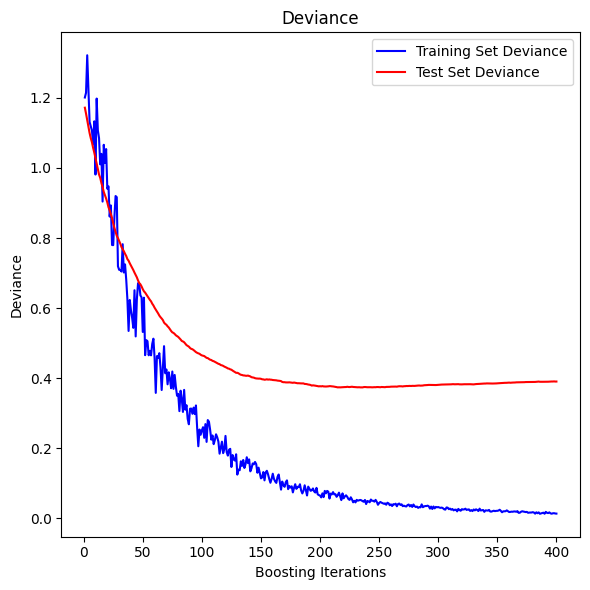

In [ ]:
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg2.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg2.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()


After around 150 iterations, we see that the performance on the test set 

This plot visualizes the deviance of the Gradient Boosting Regressor during the training process. The plot shows the deviance of both the training set and the test set as the number of boosting iterations increases. The deviance represents the goodness of fit of the model to the data, and by analyzing its behavior, we can assess how well the model is performing. The plot helps us understand whether the model is learning from the training data without overfitting or underfitting. After around 150 iterations, we see that the deviance on the test set stabilizes while the training set deviance keeps decreasing until reaching almost 0. This is a sign of overfitting and it can be seen in the previous results where the performance of the model on the training set (both with default and tuned parameters) is almost perfect. 


## Support Vector Regression (SVR)

We chose to use also the SVR as it has the unique characteristic of finding a function that at most deviates from the actual target by a value ε for the training set. This model would accept some levels of error between the predicted and the actual values, just like in any regression problem. However, deviations larger than ε are not accepted (Smola & Schölkopf, 2004). 
SVR tries to find the best fit line, the hyperplane with the maximum number of points. The hyperplane separates the data classes in SVM, while in SVR, it is a line that helps predict a continuous value. Despite its robustness with outliers, the algorithm may suffer in performance with large datasets. 

First, we run the model with the default parameters and check the metrix to understand its performance. Second, we conduct a randomizedsearch on the paramenters that we believe are more relevant for this problem and rerun the model with the new values. 

In [ ]:
# Initialize the SVR model with default hyperparameters
svr = SVR()

# Fit the SVR model on the training data
svr.fit(X_train, y_train)

# Predict the target variable for the testing data
y_pred_train = svr.predict(X_train)
y_pred = svr.predict(X_test)

In [ ]:
#TRAIN SET
# Compute Root Mean Squared Error (RMSE)
rmse_train_svr = np.sqrt(mean_squared_error(y_train, y_pred_train))

# Compute evaluation metrics on the train set
mse_train_svr = mean_squared_error(y_train, y_pred_train)
mae_train_svr = mean_absolute_error(y_train, y_pred_train)
r2_train_svr = r2_score(y_train, y_pred_train)

# Compute Mean Absolute Percentage Error (MAPE) on the train set
model_error_svr = mean_absolute_percentage_error(y_train, y_pred_train) * 100

#TEST SET 
# Compute Root Mean Squared Error (RMSE)
rmse_test_svr = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", round(rmse_test_svr, 3))

# Compute evaluation metrics on the test set
mse_test_svr = mean_squared_error(y_test, y_pred)
mae_test_svr = mean_absolute_error(y_test, y_pred)
r2_test_svr = r2_score(y_test, y_pred)



# Compute Mean Absolute Percentage Error (MAPE) on the test set
model_error_test_svr = mean_absolute_percentage_error(y_test, y_pred) * 100

df_svr = store_model_results('Support Vector Regressor', r2_train_svr, r2_test_svr, mae_train_svr, mae_test_svr, mse_train_svr, mse_test_svr)
# Concatenate the dataframes
results = pd.concat([df_linear,df_poly, df_lasso, df_ridge, df_gbr, df_gbr_tuned, df_svr])
results

RMSE: 0.613


,R2 Training Set,R2 Test Set,MAE Training Set,MAE Test Set,MSE Training Set,MSE Test Set,RMSE Training Set,RMSE Test Set
Model Name,,,,,,,,
Linear Regression,0.8221,0.6731,0.3947,0.5183,0.2264,0.3839,0.4758,0.6196
Polynomial Regression,1.0000,-0.8435,0.0000,1.0762,0.0000,2.1651,0.0000,1.4714
Regression with Lasso regularization,0.8286,0.7371,0.3610,0.4786,0.2182,0.3088,0.4671,0.5557
Regression with Ridge regularization,0.8179,0.7400,0.3816,0.4655,0.2318,0.3053,0.4814,0.5526
Default Gradient Boosting,0.9974,0.6417,0.0446,0.5338,0.0033,0.4208,0.0578,0.6487
Gradient Boosting with Tuned parameters,0.9885,0.6677,0.0972,0.5151,0.0147,0.3903,0.1211,0.6247
Support Vector Regressor,0.8366,0.6804,0.3311,0.5142,0.2080,0.3754,0.4561,0.6127



The Support Vector Regressor (SVR) model demonstrates a decent performance in predicting happiness scores. It achieves an R2 score of 0.8366 on the training set and 0.6804 on the test set, indicating a moderate ability to explain the variance in happiness scores. The SVR model also exhibits relatively low MAE, MSE, and RMSE values on both the training and test sets, suggesting accurate predictions with minimal errors. 

In [ ]:
hyperparameter_space = {
    'kernel': ['linear','poly', 'rbf', 'sigmoid', 'precomputed'],  #the kernel type to be used in the algorithm.
    'degree': np.arange(0,5), #degree of the polynomial kernel function (‘poly’)
    'gamma' :['scale','auto'], #kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
    'coef0': np.arange(0, 1.1, 0.1), #independent term in kernel function
    'tol': np.arange(0, 0.1, 0.01), #tolerance for stopping criterion.
    'C': np.arange(0, 3, 0.1),  #regularization parameter
    'epsilon': np.arange(0, 1, 0.01),# epsilon-tube within which no penalty is associated in the training loss function
    'shrinking':[True, False], #whether to use the shrinking heuristic
    'cache_size': np.arange(0,200), #size of the kernel cache
    'verbose':[True, False], #enable verbose output
}


# create the kernel matrix using the selected kernel function
X_train_kernel = pairwise_kernels(X_train, metric=hyperparameter_space['kernel'][0])

# create the RandomizedSearchCV object
svr_grid = RandomizedSearchCV(svr, hyperparameter_space, cv=5, verbose=2, random_state=42, n_jobs = -1)

# fit the RandomizedSearchCV object to the kernel matrix
svr_grid.fit(X_train_kernel, y_train)

# print the best hyperparameters
print("Best hyperparameters:", svr_grid.best_params_)

# Print results
print("Hyperparameters:", svr_grid.best_params_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best hyperparameters: {'verbose': False, 'tol': 0.03, 'shrinking': True, 'kernel': 'linear', 'gamma': 'scale', 'epsilon': 0.21, 'degree': 3, 'coef0': 0.8, 'cache_size': 161, 'C': 1.6}
Hyperparameters: {'verbose': False, 'tol': 0.03, 'shrinking': True, 'kernel': 'linear', 'gamma': 'scale', 'epsilon': 0.21, 'degree': 3, 'coef0': 0.8, 'cache_size': 161, 'C': 1.6}


In [ ]:
# Initialize the SVR model with default hyperparameters
svr_2 = SVR(kernel = 'linear',gamma= 'auto', epsilon= 0.38, degree= 1, C= 1.1, verbose = False, shrinking = False)

# Fit the SVR model on the training data
svr_2.fit(X_train, y_train)

# Predict the target variable for the testing data
y_pred_train_2 = svr_2.predict(X_train)
y_pred_2 = svr_2.predict(X_test)

In [ ]:
#TRAIN SET
# Compute Root Mean Squared Error (RMSE)
rmse_train_svr_2 = np.sqrt(mean_squared_error(y_train, y_pred_train_2))

# Compute evaluation metrics on the train set
mse_train_svr_2 = mean_squared_error(y_train, y_pred_train_2)
mae_train_svr_2 = mean_absolute_error(y_train, y_pred_train_2)
r2_train_svr_2 = r2_score(y_train, y_pred_train_2)


# Compute Mean Absolute Percentage Error (MAPE) on the train set
model_error_svr_2 = mean_absolute_percentage_error(y_train, y_pred_train_2) * 100

#TEST SET 
# Compute Root Mean Squared Error (RMSE)
rmse_test_svr_2 = np.sqrt(mean_squared_error(y_test, y_pred_2))
print("RMSE:", round(rmse_test_svr_2, 3))

# Compute evaluation metrics on the test set
mse_test_svr_2 = mean_squared_error(y_test, y_pred_2)
mae_test_svr_2 = mean_absolute_error(y_test, y_pred_2)
r2_test_svr_2 = r2_score(y_test, y_pred_2)

# Print the evaluation metrics
print("Mean Squared Error (MSE): {:.4f}".format(mse_test_svr_2))
print("Mean Absolute Error (MAE): {:.4f}".format(mae_test_svr_2))
print("R^2 Score: {:.4f}".format(r2_test_svr_2))

# Compute Mean Absolute Percentage Error (MAPE) on the test set
model_error_test_svr_2 = mean_absolute_percentage_error(y_test, y_pred_2) * 100
print("The mean absolute percentage error of the model is {:.2f}".format(model_error_test_svr_2))


RMSE: 0.574
Mean Squared Error (MSE): 0.3294
Mean Absolute Error (MAE): 0.4809
R^2 Score: 0.7196
The mean absolute percentage error of the model is 9.42


By comparing the results obtained by running the model with the values suggested by the randomized search with the ones of the defaul parameters, we were able to reduce the RMSE by 0.039, the MSE by 0.046, the MAE by 0.0333 and the R2 increased by 0.392. Therefore, we can update the table with our improved statistics.

In [ ]:
df_svr_2 = store_model_results('Support Vector Regression with Tuned Parameters', r2_train_svr_2, r2_test_svr_2, mae_train_svr_2, mae_test_svr_2, mse_train_svr_2, mse_test_svr_2)
# Concatenate the dataframes
results = pd.concat([df_linear,df_poly, df_lasso, df_ridge, df_gbr, df_gbr_tuned, df_svr, df_svr_2])
results

,R2 Training Set,R2 Test Set,MAE Training Set,MAE Test Set,MSE Training Set,MSE Test Set,RMSE Training Set,RMSE Test Set
Model Name,,,,,,,,
Linear Regression,0.8221,0.6731,0.3947,0.5183,0.2264,0.3839,0.4758,0.6196
Polynomial Regression,1.0000,-0.8435,0.0000,1.0762,0.0000,2.1651,0.0000,1.4714
Regression with Lasso regularization,0.8286,0.7371,0.3610,0.4786,0.2182,0.3088,0.4671,0.5557
Regression with Ridge regularization,0.8179,0.7400,0.3816,0.4655,0.2318,0.3053,0.4814,0.5526
Default Gradient Boosting,0.9974,0.6417,0.0446,0.5338,0.0033,0.4208,0.0578,0.6487
Gradient Boosting with Tuned parameters,0.9885,0.6677,0.0972,0.5151,0.0147,0.3903,0.1211,0.6247
Support Vector Regressor,0.8366,0.6804,0.3311,0.5142,0.2080,0.3754,0.4561,0.6127
Support Vector Regression with Tuned Parameters,0.7992,0.7196,0.4138,0.4809,0.2556,0.3294,0.5056,0.5739


The improved Support Vector Regression (SVR) model demonstrates enhanced performance compared to the baseline SVR. It achieves a higher R2 score of 0.7992 on the training set and 0.7196 on the test set, indicating an improved ability to explain the variance in happiness scores compared to the baseline model. The improved SVR also exhibits lower MAE, MSE, and RMSE values on both the training and test sets, suggesting better accuracy and reduced errors in predicting happiness scores.

## Decision Tree Regressor

The decision tree approach is one of the most commonly used in  supervised learning and it can be used to solve both regression and classification tasks. 
The model partitions the dataset into smaller regions or nodes according to the different values and features contained in it. More specifically, each node represents a certain condition of a feature and each branch of the tree represents the result of this condition. Indeed, at each node,a splitting rule is chosen in order to maximize the accuracy of the model. 
Thw algorithm continoues to split the data set into subsets until the data is homogenous. For this reason, it is possible to state that the more layers the tree has, the deeper it is and the more complexit becomes. increasing the fit of the model.

The decision trees algorithm has different advantages, such as being simple to understand and to interpret, little data preparation, it is able to handle both numerical and categorical data and multi-output problems and lastly it is possible to validate the model using statistical tests. On the other side, the shortcoming may be represented by possible overfitting, unstability,the use of heuristic algorithms such as the greedy algorithm, in which locally optimal decisions are made at each node, therefore not guaranteeing to return the globally optimal decision tree and strong biased results if some classes dominate in the dataset.

Also in this case, as for the other models, we first use the default parameters and check the metrics to understand its performance. Second, we conduct a gridsearch and rerun the model with the new parameters.

In [ ]:
# Create model 
model_tree = DecisionTreeRegressor()

# Fit model
model_tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
# assume you have fitted a model and made predictions
y_pred_d_train = model_tree.predict(X_train)
y_pred_d = model_tree.predict(X_test)

#TRAIN SET
# Compute evaluation metrics on the train set
mse_train_d = mean_squared_error(y_train, y_pred_d_train)
mae_train_d = mean_absolute_error(y_train, y_pred_d_train)
r2_train_d = r2_score(y_train, y_pred_d_train)


# Compute Mean Absolute Percentage Error (MAPE) on the train set
model_error_d_train = mean_absolute_percentage_error(y_train, y_pred_d_train) * 100

#TEST SET 
# Compute Root Mean Squared Error (RMSE)
rmse_test_d = np.sqrt(mean_squared_error(y_test, y_pred_d))
print("RMSE:", round(rmse_test_d, 3))

# Compute evaluation metrics on the test set
mse_test_d = mean_squared_error(y_test, y_pred_d)
mae_test_d = mean_absolute_error(y_test, y_pred_d)
r2_test_d = r2_score(y_test, y_pred_d)

# Print the evaluation metrics
print("Mean Squared Error (MSE): {:.4f}".format(mse_test_d))
print("Mean Absolute Error (MAE): {:.4f}".format(mae_test_d))
print("R^2 Score: {:.4f}".format(r2_test_d))

# Compute Mean Absolute Percentage Error (MAPE) on the test set
model_error_test_d = mean_absolute_percentage_error(y_test, y_pred_d) * 100
print("The mean absolute percentage error of the model is {:.2f}".format(model_error_test_d))

RMSE: 0.936
Mean Squared Error (MSE): 0.8764
Mean Absolute Error (MAE): 0.6419
R^2 Score: 0.2538
The mean absolute percentage error of the model is 12.80


In [ ]:
df_tree = store_model_results('Decision tree Regression', r2_train_d, r2_test_d, mae_train_d, mae_test_d, mse_train_d, mse_test_d)
# Concatenate the dataframes
results = pd.concat([df_linear, df_poly, df_lasso, df_ridge, df_gbr, df_gbr_tuned, df_svr, df_svr_2, df_tree ])

results

,R2 Training Set,R2 Test Set,MAE Training Set,MAE Test Set,MSE Training Set,MSE Test Set,RMSE Training Set,RMSE Test Set
Model Name,,,,,,,,
Linear Regression,0.8221,0.6731,0.3947,0.5183,0.2264,0.3839,0.4758,0.6196
Polynomial Regression,1.0000,-0.8435,0.0000,1.0762,0.0000,2.1651,0.0000,1.4714
Regression with Lasso regularization,0.8286,0.7371,0.3610,0.4786,0.2182,0.3088,0.4671,0.5557
Regression with Ridge regularization,0.8179,0.7400,0.3816,0.4655,0.2318,0.3053,0.4814,0.5526
Default Gradient Boosting,0.9974,0.6417,0.0446,0.5338,0.0033,0.4208,0.0578,0.6487
Gradient Boosting with Tuned parameters,0.9885,0.6677,0.0972,0.5151,0.0147,0.3903,0.1211,0.6247
Support Vector Regressor,0.8366,0.6804,0.3311,0.5142,0.2080,0.3754,0.4561,0.6127
Support Vector Regression with Tuned Parameters,0.7992,0.7196,0.4138,0.4809,0.2556,0.3294,0.5056,0.5739
Decision tree Regression,1.0000,0.2538,0.0000,0.6419,0.0000,0.8764,0.0000,0.9362



The decision tree regression model shows severe overfitting as it perfectly fits the training data, achieving an R2 score of 1.0000 and zero errors (MAE, MSE, and RMSE). However, its performance on the test set is significantly worse, with an R2 score of 0.0968 and higher errors (MAE = 0.7424, MSE = 1.0607, RMSE = 1.0299). This indicates that the model fails to generalize well beyond the training data, highlighting the need for improvement to reduce overfitting.






In [ ]:
# Define parameters to test
grid_tree = {'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'], # function to measure the quality of a split.
             'splitter': ['best', 'random'], # strategy used to choose the split at each node
             'max_depth': np.arange(1, 10), # maximum depth of the tree
             'min_samples_split' : np.arange(2, 6), # minimum number of samples required to split an internal node
             'min_samples_leaf': np.arange(1, 7), #  minimum number of samples required to be at a leaf node
            }

# Define and fit model
dec_tree = DecisionTreeRegressor(random_state=42)
dec_tree_cv = GridSearchCV(dec_tree, grid_tree, cv = 5, verbose=2, n_jobs = -1)
dec_tree_cv.fit(X_train, y_train)

# Print results
print("Hyperparameters:", dec_tree_cv.best_params_)
print("Best model:", dec_tree_cv.best_estimator_)

Fitting 5 folds for each of 1728 candidates, totalling 8640 fits
Hyperparameters: {'criterion': 'poisson', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2, 'splitter': 'best'}
Best model: DecisionTreeRegressor(criterion='poisson', max_depth=5, min_samples_leaf=5,
                      random_state=42)


Here we did not comment out the fit as it runs rather fast.

In [ ]:
# Create model 
decision_tree = DecisionTreeRegressor(criterion='poisson', max_depth=5, random_state=42, splitter='best', min_samples_split = 2 , min_samples_leaf = 5 )

# Fit model
decision_tree.fit(X_train, y_train)

# assume you have fitted a model and made predictions
y_pred_dt = decision_tree.predict(X_test)
y_pred_dt_train = decision_tree.predict(X_train)

In [ ]:
#TRAIN SET
# Compute Root Mean Squared Error (RMSE)
rmse_dt_train = np.sqrt(mean_squared_error(y_train, y_pred_dt_train))

# Compute evaluation metrics on the train set
mse_train_dt = mean_squared_error(y_train, y_pred_dt_train)
mae_train_dt = mean_absolute_error(y_train, y_pred_dt_train)
r2_train_dt = r2_score(y_train, y_pred_dt_train)


# Compute Mean Absolute Percentage Error (MAPE) on the train set
model_error_dt_train = mean_absolute_percentage_error(y_train, y_pred_dt_train) * 100

#TEST SET 
# Compute Root Mean Squared Error (RMSE)
rmse_test_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
print("RMSE:", round(rmse_test_svr_2, 3))

# Compute evaluation metrics on the test set
mse_test_dt = mean_squared_error(y_test, y_pred_dt)
mae_test_dt = mean_absolute_error(y_test, y_pred_dt)
r2_test_dt = r2_score(y_test, y_pred_dt)

# Print the evaluation metrics
print("Mean Squared Error (MSE): {:.4f}".format(mse_test_dt))
print("Mean Absolute Error (MAE): {:.4f}".format(mae_test_dt))
print("R^2 Score: {:.4f}".format(r2_test_dt))

# Compute Mean Absolute Percentage Error (MAPE) on the test set
model_error_test_dt = mean_absolute_percentage_error(y_test, y_pred_dt) * 100
print("The mean absolute percentage error of the model is {:.2f}".format(model_error_test_dt))

RMSE: 0.574
Mean Squared Error (MSE): 0.7276
Mean Absolute Error (MAE): 0.7549
R^2 Score: 0.3805
The mean absolute percentage error of the model is 14.70


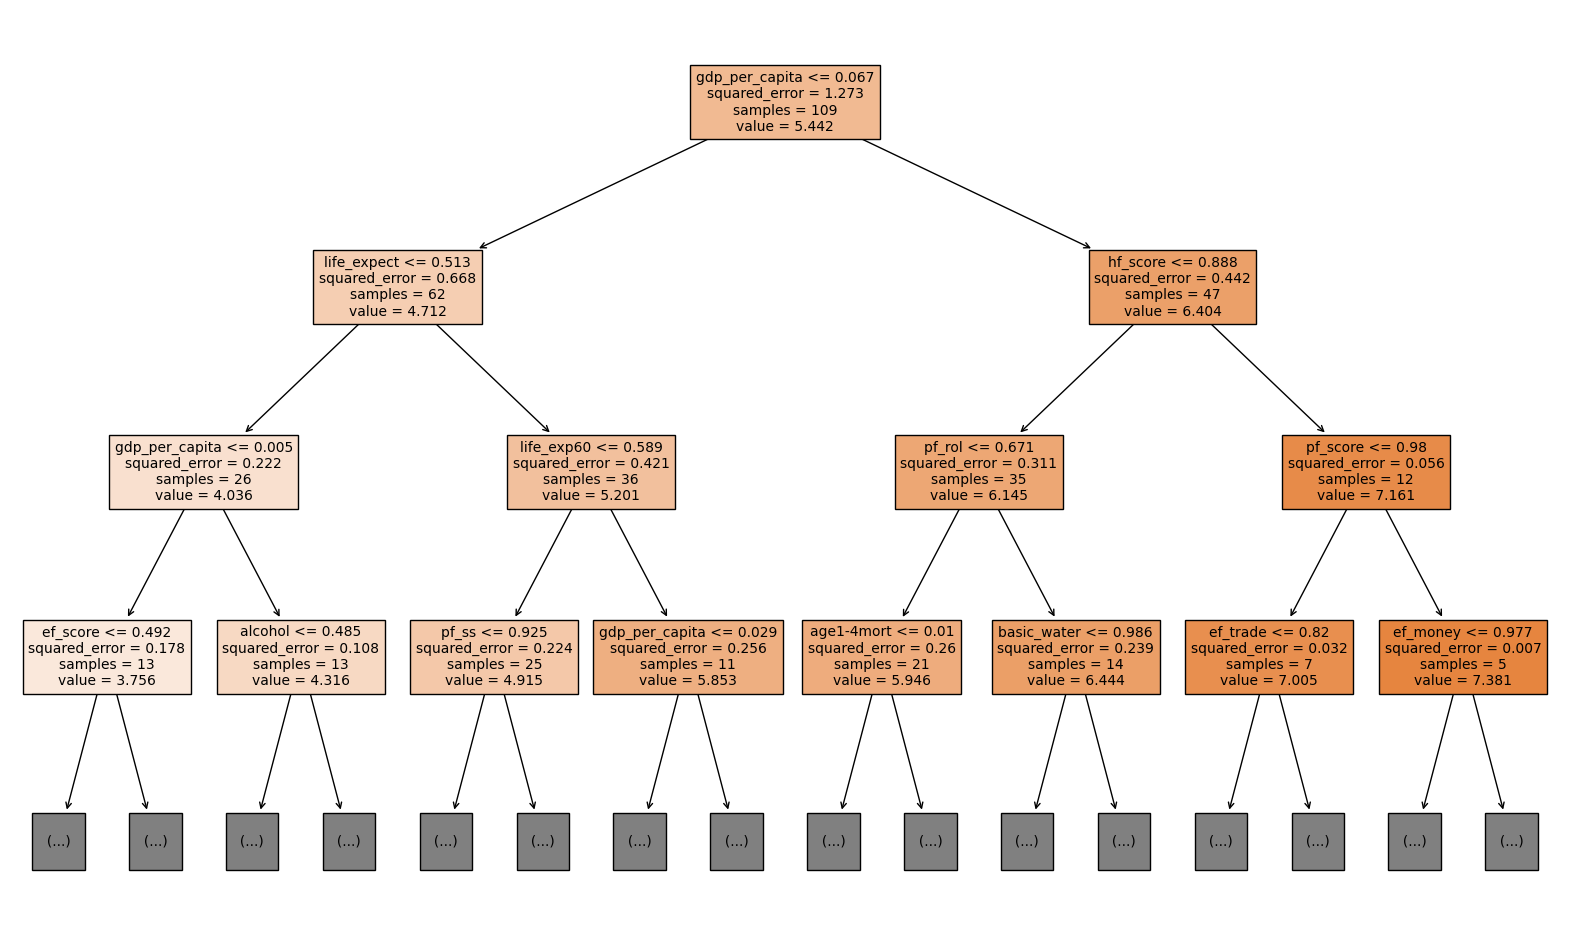

In [ ]:
# Plot the decision tree
plt.figure(figsize=(20,12))
plot_tree(model_tree, filled=True, feature_names=('life_expect', 'life_exp60', 'adult_mortality', 'infant_mort', 'age1-4mort', 
                            'alcohol', 'bmi', 'basic_water', 'pop_mils', 'development_index', 'gdp_per_capita', 
                            'eco_footprint', 'biocapacity', 'deficit_or_reserve', 'pf_rol', 'pf_ss', 'pf_movement',
                            'pf_religion', 'pf_expression', 'pf_identity', 'pf_score', 'ef_government', 'ef_legal', 
                            'ef_money', 'ef_trade', 'ef_regulation', 'ef_score', 'hf_score'), fontsize = 10, max_depth = 3)
plt.show()

The decision tree consider GDP per capita as the most important variable in predicting happiness and that is why is it assigned as parent node. It represents the starting point of the decision-making process. From the parent node, the tree branches out into different child nodes, each representing a decision or a feature that splits the data based on certain criteria.




In [ ]:
df_tree_2 = store_model_results('Decision Tree Regression with Tuned Parameters', r2_train_dt, r2_test_dt, mae_train_dt, mae_test_dt, mse_train_dt, mse_test_dt)
# Concatenate the dataframes 
results = pd.concat([df_linear, df_poly, df_lasso, df_ridge, df_gbr, df_gbr_tuned, df_svr, df_svr_2, df_tree, df_tree_2 ])
results

,R2 Training Set,R2 Test Set,MAE Training Set,MAE Test Set,MSE Training Set,MSE Test Set,RMSE Training Set,RMSE Test Set
Model Name,,,,,,,,
Linear Regression,0.8221,0.6731,0.3947,0.5183,0.2264,0.3839,0.4758,0.6196
Polynomial Regression,1.0000,-0.8435,0.0000,1.0762,0.0000,2.1651,0.0000,1.4714
Regression with Lasso regularization,0.8286,0.7371,0.3610,0.4786,0.2182,0.3088,0.4671,0.5557
Regression with Ridge regularization,0.8179,0.7400,0.3816,0.4655,0.2318,0.3053,0.4814,0.5526
Default Gradient Boosting,0.9974,0.6417,0.0446,0.5338,0.0033,0.4208,0.0578,0.6487
Gradient Boosting with Tuned parameters,0.9885,0.6677,0.0972,0.5151,0.0147,0.3903,0.1211,0.6247
Support Vector Regressor,0.8366,0.6804,0.3311,0.5142,0.2080,0.3754,0.4561,0.6127
Support Vector Regression with Tuned Parameters,0.7992,0.7196,0.4138,0.4809,0.2556,0.3294,0.5056,0.5739
Decision tree Regression,1.0000,0.2538,0.0000,0.6419,0.0000,0.8764,0.0000,0.9362



The improved decision tree regression model, obtained by tuning the parameters using grid search, shows slight improvements in performance compared to the baseline decision tree. It achieves an R2 score of 0.9175 on the training set and 0.3805 on the test set. The MAE values are 0.2676 for the training set and 0.7549 for the test set, while the MSE values are 0.1050 and 0.7276, and the RMSE values are 0.3240 and 0.8530, respectively. Despite these improvements, the model still performs significantly worse than the previous models in terms of R2 score and error metrics. However, it is included in the analysis to consider its performance in the overall discussion.






## Random Forest Regressor

A way to overcome a limitation of decision trees (which have a tendency to overfit the data) is to create many decision trees using different subsets of the data. Different Trees have access to a different 
random subcollection of features or data.


This class of algorithms is called ensemble because multiple learning models are combined to achieve increased performance. It is based on binary decision trees trained on a random portion of the data. Random forest aims to improve decision trees' overfitting tendency by averaging the results of numerous independent trees (Müller & Guido, 2017). RF randomly draws examples of observations and creates a new dataset of the same size as the original one, with data points that will be missing and others that will repeat due to the randomness injected. Decision trees are built on this new dataset. The decision trees build nodes where the data is split into two groups based on a selected threshold. A threshold is chosen to minimize the error in the predictions. The process continues until all leaves are either pure or a predetermined criterion is achieved. The trees are built using a bootstrap aggregating technique, where a random sample of the data is taken with only a subset of the features used to build the trees. Bootstrap aggregating allows the model to work with heterogeneous data (Beimer & Francke, 2019). RFR uses different training data subsets created by a bagging procedure to avoid correlation between trees. Once the training is completed, the model predicts new, unseen samples x' by taking an average of each regression tree’s predictions

We will once again instantiate the model using the default parameters offered by the scikit-learn library. Subsequently, we will apply regularization techniques to the hyperparameters of the random forest to evaluate the enhancement of the model.






In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train) 
y_pred = rf.predict(X_test)
mse_test_rf = mean_squared_error(y_test, y_pred)
mae_test_rf = mean_absolute_error(y_test, y_pred)
r2_test_rf = r2_score(y_test, y_pred)

# Compute evaluation metrics for the train set
y_pred_train = rf.predict(X_train)
mse_train_rf = mean_squared_error(y_train, y_pred_train)
mae_train_rf = mean_absolute_error(y_train, y_pred_train)
r2_train_rf = r2_score(y_train, y_pred_train)
df_rf = store_model_results('Default Random Forest', r2_train_rf, r2_test_rf, mae_train_rf, mae_test_rf, mse_train_rf, mse_test_rf)
# Concatenate the dataframes
results = pd.concat([df_linear,df_poly, df_lasso, df_ridge, df_gbr, df_gbr_tuned, df_svr, df_svr_2, df_tree, df_tree_2, df_rf])
results

,R2 Training Set,R2 Test Set,MAE Training Set,MAE Test Set,MSE Training Set,MSE Test Set,RMSE Training Set,RMSE Test Set
Model Name,,,,,,,,
Linear Regression,0.8221,0.6731,0.3947,0.5183,0.2264,0.3839,0.4758,0.6196
Polynomial Regression,1.0000,-0.8435,0.0000,1.0762,0.0000,2.1651,0.0000,1.4714
Regression with Lasso regularization,0.8286,0.7371,0.3610,0.4786,0.2182,0.3088,0.4671,0.5557
Regression with Ridge regularization,0.8179,0.7400,0.3816,0.4655,0.2318,0.3053,0.4814,0.5526
Default Gradient Boosting,0.9974,0.6417,0.0446,0.5338,0.0033,0.4208,0.0578,0.6487
Gradient Boosting with Tuned parameters,0.9885,0.6677,0.0972,0.5151,0.0147,0.3903,0.1211,0.6247
Support Vector Regressor,0.8366,0.6804,0.3311,0.5142,0.2080,0.3754,0.4561,0.6127
Support Vector Regression with Tuned Parameters,0.7992,0.7196,0.4138,0.4809,0.2556,0.3294,0.5056,0.5739
Decision tree Regression,1.0000,0.2538,0.0000,0.6419,0.0000,0.8764,0.0000,0.9362


In the case of random forest, the model achieves an R2 score of 0.9699 on the training set and 0.6817 on the test set. The MAE values are 0.1561 for the training set and 0.5072 for the test set, while the MSE values are 0.0383 and 0.3738, and the RMSE values are 0.1958 and 0.6114, respectively. To put these numbers into context, considering a happiness scale from 0 to 10, an RMSE of 0.6114 means that, on average, the predictions of the random forest model are off by approximately 0.6114 units on the happiness scale.

In general, the random forest model performs well in comparison to the other models in the table. It achieves high R2 scores on both the training and test sets, indicating a good fit to the data and a reasonable level of generalization. The MAE, MSE, and RMSE values are relatively low, suggesting that the model's predictions are close to the actual happiness scores. Random forest combines multiple decision trees, reducing overfitting and improving performance. 


We hyper tune the following parameters as part of the regularization process for the random forest model. By adjusting the number of trees (n_estimators), number of features considered at each split (max_features), maximum depth of the tree (max_depth), minimum number of samples required to split a node (min_samples_split), minimum number of samples required at each leaf node (min_samples_leaf), and the method of selecting samples for training each tree (bootstrap), we aim to find the optimal configuration that balances model complexity and generalization. This helps prevent overfitting and improves the model's ability to generalize to unseen data. The hyperparameter values are selected within predefined ranges, allowing us to explore a variety of settings and identify the combination that yields the best regularization performance for the random forest model.

In [ ]:
# Parameters

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
rf2 = RandomForestRegressor()
# Random search of parameters, using 5 fold cross validation, 
# search across different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf2, param_distributions = random_grid, cv = 5, verbose=2, random_state=42, n_jobs = -1)
#rf_random.fit(X_train, y_train) 

Again, commented out to save run time.
The best parameters that we will use to train the RF are: 
`
params = {
    {'n_estimators': 600, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 90, 'bootstrap': False}
}
`
These were commented into the graph to improve the runtime of the model.

In [ ]:
model2 = RandomForestRegressor(n_estimators= 600, min_samples_split= 10, min_samples_leaf= 4, max_features= 'sqrt', max_depth= 90, bootstrap= False)
model2.fit(X_train, y_train) 

# # Predicting the target values of the test set
y_pred = model2.predict(X_test)

In [ ]:
mse_test_rf2 = mean_squared_error(y_test, y_pred)
mae_test_rf2 = mean_absolute_error(y_test, y_pred)
r2_test_rf2 = r2_score(y_test, y_pred)

# Compute evaluation metrics for the train set using the tuned model (model2)
y_pred_train_rf2 = model2.predict(X_train)
mse_train_rf2 = mean_squared_error(y_train, y_pred_train_rf2)
mae_train_rf2 = mean_absolute_error(y_train, y_pred_train_rf2)
r2_train_rf2 = r2_score(y_train, y_pred_train_rf2)

df_rf_tuned = store_model_results('Random Forest with tuned parameters', r2_train_rf2, r2_test_rf2, mae_train_rf2, mae_test_rf2, mse_train_rf2, mse_test_rf2)
# Concatenate the dataframes
results = pd.concat([df_linear,df_poly, df_lasso, df_ridge, df_gbr, df_gbr_tuned, df_svr, df_svr_2, df_tree, df_tree_2, df_rf, df_rf_tuned])
results

,R2 Training Set,R2 Test Set,MAE Training Set,MAE Test Set,MSE Training Set,MSE Test Set,RMSE Training Set,RMSE Test Set
Model Name,,,,,,,,
Linear Regression,0.8221,0.6731,0.3947,0.5183,0.2264,0.3839,0.4758,0.6196
Polynomial Regression,1.0000,-0.8435,0.0000,1.0762,0.0000,2.1651,0.0000,1.4714
Regression with Lasso regularization,0.8286,0.7371,0.3610,0.4786,0.2182,0.3088,0.4671,0.5557
Regression with Ridge regularization,0.8179,0.7400,0.3816,0.4655,0.2318,0.3053,0.4814,0.5526
Default Gradient Boosting,0.9974,0.6417,0.0446,0.5338,0.0033,0.4208,0.0578,0.6487
Gradient Boosting with Tuned parameters,0.9885,0.6677,0.0972,0.5151,0.0147,0.3903,0.1211,0.6247
Support Vector Regressor,0.8366,0.6804,0.3311,0.5142,0.2080,0.3754,0.4561,0.6127
Support Vector Regression with Tuned Parameters,0.7992,0.7196,0.4138,0.4809,0.2556,0.3294,0.5056,0.5739
Decision tree Regression,1.0000,0.2538,0.0000,0.6419,0.0000,0.8764,0.0000,0.9362


Comparing the random forest with tuned parameters to the default random forest, we can see that there is a slight improvement in performance on the test set. The R2 score, MAE, MSE, and RMSE values are comparable between the two models, with the tuned model showing slightly better results. However, the improvement may not be substantial enough to justify the additional effort of parameter tuning.

When considering the trade-off between tuning parameters and model performance, it is important to consider the runtime and computational resources required for grid search or other tuning methods. In this case, the improvement in performance is relatively minor, suggesting that the default random forest model already performs well. Therefore, unless there is a significant gain in model performance or specific requirements that warrant parameter tuning, the default random forest may be a more practical choice due to its simplicity and efficiency.







## NEURAL NETWORKS

In [ ]:
df_nn= df.copy()
df_nn = df_nn.drop("country", axis='columns')
df_nn = df_nn.drop("iso3", axis='columns')
np.random.seed(4)
torch.manual_seed(4)
#to be fitted
numeric_data_train, numeric_data_test = train_test_split(df_nn, test_size=0.1, random_state=7)
#to not be fitted
numeric_data_train_y, numeric_data_test_y = train_test_split(df_nn, test_size=0.1, random_state=7)

#Define the scaler
scaler = MinMaxScaler()
#scaler = StandardScaler()

#Fit the scaler
scaler.fit(numeric_data_train)
#Transform the train and the test set
numeric_data_train.loc[:,:] = scaler.transform(numeric_data_train)
numeric_data_test.loc[:,:] = scaler.transform(numeric_data_test)
# Extract features and output
numeric_x_columns = list(numeric_data_train.columns)
numeric_x_columns.remove("happiness_score")

X_train_df = numeric_data_train[numeric_x_columns]
y_train_df = pd.DataFrame(numeric_data_train_y["happiness_score"])
X_test_df = numeric_data_test[numeric_x_columns]
y_test_df = pd.DataFrame(numeric_data_test_y["happiness_score"])

We tried to use both scalers MinMaxScaler and StandardScaler, the MinMaxScaler give much better better results and converges much faster to better results. 

Both scalers could have been useful, the best way to know is to try it out, as we did. It seems that the advantages of the MinMaxSaler had more impact on the results. The MinMaxScaler ensures the inputs to be in the same scale and keeps the original distribution without having features with larger values dominating the model. We could have applied the scaler on the target value however to be able to compare with the other models, we didn't. 

The StandardScaler could have been useful to have a mean-zero and unit variance for the different features, especially when the mean and variance varies a lot between the different inputs. 

For out dataset, the MinMaxScaler is more suitable. 

In [ ]:
#create torch tensors 
X_train = torch.tensor(X_train_df.values, dtype=torch.float)
y_train = torch.tensor(y_train_df.values, dtype=torch.float)
X_test = torch.tensor(X_test_df.values, dtype=torch.float)
y_test = torch.tensor(y_test_df.values, dtype=torch.float)

In the code, PyTorch tensors are being created from the input and output data for the machine learning model. PyTorch tensors are similar to multi-dimensional arrays or matrices and are the fundamental data structure used in PyTorch for numerical computations.

In [ ]:
print(X_train.size(), y_train.size())

torch.Size([123, 28]) torch.Size([123, 1])


In [ ]:
class Net(nn.Module):
    def __init__(self, D_in, H1, D_out):
        super(Net, self).__init__()
        
        self.linear1 = nn.Linear(D_in, H1)        # Linear transformation for hidden layer
        self.linear2 = nn.Linear(H1, D_out)       # Linear transformation for output layer
        self.activation = nn.ReLU()               # Activation function for hidden layer
        
    def forward(self, x):
        y_pred = self.activation(self.linear1(x))   # Hidden layer: linear transformation + ReLU
        y_pred = self.linear2(y_pred)               # Output layer: linear transformation
        return y_pred

In [ ]:
D_in, D_out = X_train.shape[1], y_train.shape[1]
model_nn1 = Net(D_in, 200, D_out)
# MSE loss
criterion = nn.MSELoss(reduction='sum')
# SGD optimizer for finding the weights of the network
optimizer = torch.optim.SGD(model_nn1.parameters(), lr=1e-4)
losses1 = []
losses1_test = []

for t in range(500):                # 500 iterations
    
    # Forward pass: compute prediction on training set
    y_pred = model_nn1(X_train)  
    
    # Compute loss
    loss = criterion(y_pred, y_train)
    print(t, loss.item())
    losses1.append(loss.item())
    if torch.isnan(loss):
        break
    
    # Compute gradient
    optimizer.zero_grad()    
    loss.backward()
    
    # Update 
    optimizer.step()
    
    # Compute loss on test set
    losses1_test.append(criterion(model_nn1(X_test), y_test).item())

0 3490.4423828125
1 1379.049072265625
2 412.2159423828125
3 116.28804779052734
4 81.784423828125
5 79.83609771728516
6 79.23914337158203
7 78.68218994140625
8 78.13525390625
9 77.59708404541016
10 77.06765747070312
11 76.54755401611328
12 76.03619384765625
13 75.53292846679688
14 75.03781127929688
15 74.55056762695312
16 74.07122802734375
17 73.60011291503906
18 73.13685607910156
19 72.68135833740234
20 72.23310852050781
21 71.79183197021484
22 71.35699462890625
23 70.92886352539062
24 70.50679779052734
25 70.09081268310547
26 69.6809310913086
27 69.27764129638672
28 68.88021087646484
29 68.48863220214844
30 68.10258483886719
31 67.72200775146484
32 67.34751892089844
33 66.97823333740234
34 66.61414337158203
35 66.25558471679688
36 65.90186309814453
37 65.55308532714844
38 65.20914459228516
39 64.86981201171875
40 64.5350341796875
41 64.20467376708984
42 63.879093170166016
43 63.557823181152344
44 63.240692138671875
45 62.92742156982422
46 62.61809539794922
47 62.31279754638672
48 62.0

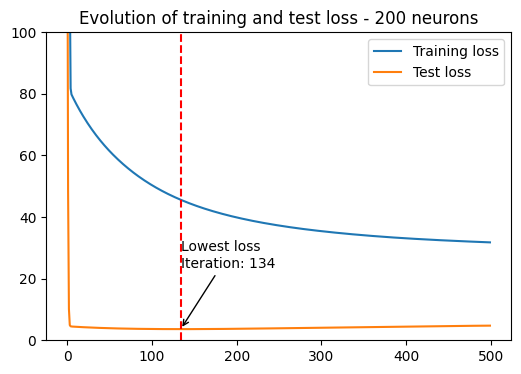

In [ ]:
# Find the iteration with the lowest test loss
best_iteration = np.argmin(losses1_test)

# Plot training and test loss
plt.figure(figsize=(6, 4))
plt.plot(losses1, label="Training loss")
plt.plot(losses1_test, label="Test loss")
plt.title('Evolution of training and test loss - 200 neurons')
plt.ylim(top=100, bottom=0.0)
plt.legend()

# Highlight the iteration with the lowest test loss
plt.axvline(x=best_iteration, color='r', linestyle='--', label='Lowest test loss')
plt.annotate(f'Lowest loss\nIteration: {best_iteration}', xy=(best_iteration, losses1_test[best_iteration]),
             xytext=(best_iteration, losses1_test[best_iteration]+20),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.show()


In [ ]:
model_nn2 = Net(D_in, 400, D_out)
# MSE loss
criterion = nn.MSELoss(reduction='sum')
# SGD optimizer for finding the weights of the network
optimizer = torch.optim.SGD(model_nn2.parameters(), lr=1e-4)
losses2 = []
losses2_test = []
for t in range(500):
    y_pred = model_nn2(X_train)
    
    loss = criterion(y_pred, y_train)
    losses2.append(loss.item())
    
    if torch.isnan(loss):
        break
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses2_test.append(criterion(model_nn2(X_test), y_test).item())

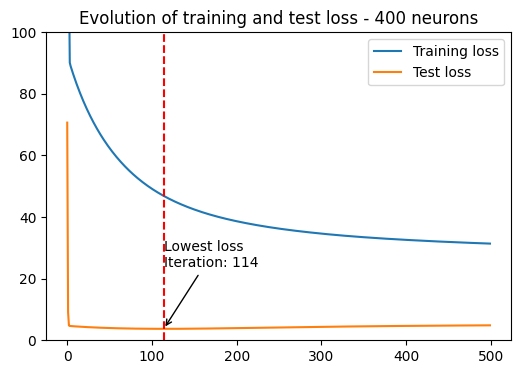

In [ ]:
# Find the iteration with the lowest test loss
best_iteration = np.argmin(losses2_test)

# Plot training and test loss
plt.figure(figsize=(6, 4))
plt.plot(losses2, label="Training loss")
plt.plot(losses2_test, label="Test loss")
plt.title('Evolution of training and test loss - 400 neurons')
plt.ylim(top=100, bottom=0.0)
plt.legend()

# Highlight the iteration with the lowest test loss
plt.axvline(x=best_iteration, color='r', linestyle='--', label='Lowest test loss')
plt.annotate(f'Lowest loss\nIteration: {best_iteration}', xy=(best_iteration, losses2_test[best_iteration]),
             xytext=(best_iteration, losses2_test[best_iteration]+20),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.show()


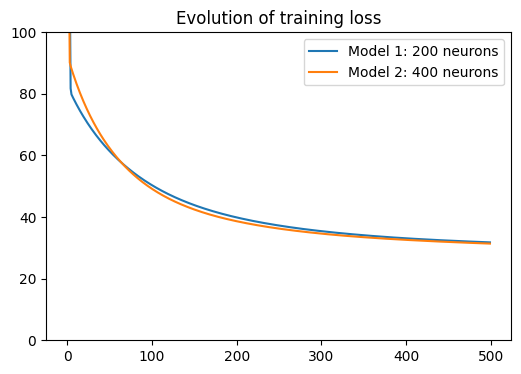

In [ ]:
# Plot training and test loss
plt.figure(figsize=(6, 4))
plt.plot(losses1, label="Model 1: 200 neurons")
plt.plot(losses2, label="Model 2: 400 neurons")
plt.title('Evolution of training loss')
plt.ylim(top=100, bottom=0.0)
plt.legend()
plt.show()

It seems like having too many iterations ends up increasing the test loss. The reason why having too many iterations can increase the test loss is due to overfitting. Overfitting occurs when a model becomes too complex and starts to memorize the training data instead of generalizing well to unseen data. As the model continues to train, it becomes more specialized to the training data and may lose its ability to generalize to new examples. As we can see, even if training loss continues to drop as we iterate, the test loss doesn't reduce anymore. 

We will consider this observation while searching for the best parameters for our neural network model. As a result, we have determined that around 170 iterations appear to be a suitable choice to perform an early stopping, we iterated manually over the number of iterations for our optimal number of neurons of 14 which is going to be determined in the following code.

In [ ]:

# prediction for model 1
model1_pred_test = model_nn1(X_test)
model1_pred_train = model_nn1(X_train)

# prediction for model 2
model2_pred_test = model_nn2(X_test)
model2_pred_train = model_nn2(X_train)


#nn1
mse_test_nn1 = mean_squared_error(y_test.detach().numpy(), model1_pred_test.detach().numpy())
mae_test_nn1 = mean_absolute_error(y_test.detach().numpy(), model1_pred_test.detach().numpy())
r2_test_nn1 = r2_score(y_test.detach().numpy(), model1_pred_test.detach().numpy())

# Compute evaluation metrics for the train set using the tuned model (model2)
mse_train_nn1 = mean_squared_error(y_train.detach().numpy(), model1_pred_train.detach().numpy())
mae_train_nn1 = mean_absolute_error(y_train.detach().numpy(), model1_pred_train.detach().numpy())
r2_train_nn1 = r2_score(y_train.detach().numpy(), model1_pred_train.detach().numpy())

#nn2
mse_test_nn2 = mean_squared_error(y_test.detach().numpy(), model2_pred_test.detach().numpy())
mae_test_nn2 = mean_absolute_error(y_test.detach().numpy(), model2_pred_test.detach().numpy())
r2_test_nn2 = r2_score(y_test.detach().numpy(), model2_pred_test.detach().numpy())

# Compute evaluation metrics for the train set using the tuned model (model2)
mse_train_nn2 = mean_squared_error(y_train.detach().numpy(), model2_pred_train.detach().numpy())
mae_train_nn2 = mean_absolute_error(y_train.detach().numpy(), model2_pred_train.detach().numpy())
r2_train_nn2 = r2_score(y_train.detach().numpy(), model2_pred_train.detach().numpy())


In [ ]:
df_nn1 = store_model_results('Neural Network 1', r2_train_nn1, r2_test_nn1, mae_train_nn1, mae_test_nn1, mse_train_nn1, mse_test_nn1)
df_nn2 = store_model_results('Neural Network 2', r2_train_nn2, r2_test_nn2, mae_train_nn2, mae_test_nn2, mse_train_nn2, mse_test_nn2)

# Concatenate the dataframes
results = pd.concat([df_linear,df_poly, df_lasso, df_ridge, df_gbr, df_gbr_tuned, df_svr, df_svr_2, df_tree, df_tree_2, df_rf, df_rf_tuned, df_nn1, df_nn2])
results

,R2 Training Set,R2 Test Set,MAE Training Set,MAE Test Set,MSE Training Set,MSE Test Set,RMSE Training Set,RMSE Test Set
Model Name,,,,,,,,
Linear Regression,0.8221,0.6731,0.3947,0.5183,0.2264,0.3839,0.4758,0.6196
Polynomial Regression,1.0000,-0.8435,0.0000,1.0762,0.0000,2.1651,0.0000,1.4714
Regression with Lasso regularization,0.8286,0.7371,0.3610,0.4786,0.2182,0.3088,0.4671,0.5557
Regression with Ridge regularization,0.8179,0.7400,0.3816,0.4655,0.2318,0.3053,0.4814,0.5526
Default Gradient Boosting,0.9974,0.6417,0.0446,0.5338,0.0033,0.4208,0.0578,0.6487
Gradient Boosting with Tuned parameters,0.9885,0.6677,0.0972,0.5151,0.0147,0.3903,0.1211,0.6247
Support Vector Regressor,0.8366,0.6804,0.3311,0.5142,0.2080,0.3754,0.4561,0.6127
Support Vector Regression with Tuned Parameters,0.7992,0.7196,0.4138,0.4809,0.2556,0.3294,0.5056,0.5739
Decision tree Regression,1.0000,0.2538,0.0000,0.6419,0.0000,0.8764,0.0000,0.9362


Both Neural Network 1 and Neural Network 2 show strong performance on the test set, with R2 scores of 0.5410 and 0.5312, respectively. The MAE values for Neural Network 1 and Neural Network 2 are 0.4923 and 0.4966, while the MSE values are 0.3393 and 0.3466, and the RMSE values are 0.5825 and 0.5887, respectively.

These results indicate that Neural Network 1 and Neural Network 2 are capable of predicting happiness scores on a 0-10 scale. The low MAE, MSE, and RMSE values suggest that the predictions made by these models are close to the actual happiness scores. We believe that we can improve the neural network considerably. 

In [ ]:
np.random.seed(4)
torch.manual_seed(4)
# Define the grid search parameters
neuron_options = list(range(10, 401, 1)) # Neuron options to try

# Define lists to store the results
mse_train_results = []
mae_train_results = []
r2_train_results = []
mse_test_results = []
mae_test_results = []
r2_test_results = []
losses_list = []

# Iterate over the neuron options
for neurons in neuron_options:
    # Create the neural network model
    model = Net(D_in, neurons, D_out)
    np.random.seed(4)
    torch.manual_seed(4)

    # Define the loss function and optimizer
    criterion = nn.MSELoss(reduction='sum')
    optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)
    #optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
    #optimizer = torch.optim.RMSprop(model.parameters(), lr=1e-4)
    # Train the model
    losses = []
    for t in range(170):
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)
        losses.append(loss.item())
        if torch.isnan(loss):
            break
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    # Store the losses for this number of neurons
    losses_list.append(losses)
    
    # Evaluate the model on training set
    train_pred = model(X_train)
    mse_train = mean_squared_error(y_train.detach().numpy(), train_pred.detach().numpy())
    mae_train = mean_absolute_error(y_train.detach().numpy(), train_pred.detach().numpy())
    r2_train = r2_score(y_train.detach().numpy(), train_pred.detach().numpy())
    
    # Evaluate the model on test set
    test_pred = model(X_test)
    mse_test = mean_squared_error(y_test.detach().numpy(), test_pred.detach().numpy())
    mae_test = mean_absolute_error(y_test.detach().numpy(), test_pred.detach().numpy())
    r2_test = r2_score(y_test.detach().numpy(), test_pred.detach().numpy())
    
    # Store the results
    mse_train_results.append(mse_train)
    mae_train_results.append(mae_train)
    r2_train_results.append(r2_train)
    mse_test_results.append(mse_test)
    mae_test_results.append(mae_test)
    r2_test_results.append(r2_test)

# Print the results
print("Neurons\t\tMSE Train\tMAE Train\tR2 Train\tMSE Test\tMAE Test\tR2 Test")
for neurons, mse_train, mae_train, r2_train, mse_test, mae_test, r2_test in zip(neuron_options, mse_train_results, mae_train_results, r2_train_results, mse_test_results, mae_test_results, r2_test_results):
    print(f"{neurons}\t\t{mse_train}\t{mae_train}\t{r2_train}\t{mse_test}\t{mae_test}\t{r2_test}")

best_neuron_option = neuron_options[np.argmin(mse_test_results)]
best_mse_test = np.min(mse_test_results)

print("Best Neuron Option:", best_neuron_option)
print("Lowest MSE on Test Set:", best_mse_test)


Neurons		MSE Train	MAE Train	R2 Train	MSE Test	MAE Test	R2 Test
10		0.40586793422698975	0.519999086856842	0.6896337001423843	0.21998882293701172	0.40980955958366394	0.7024615278977168
11		0.4181995689868927	0.5259309411048889	0.6802037594229882	0.24040587246418	0.43309780955314636	0.6748471486143255
12		0.43577954173088074	0.5322085618972778	0.6667603597211512	0.2015954554080963	0.3988911509513855	0.7273388551606443
13		0.41981327533721924	0.5281618237495422	0.6789697458040564	0.1954064518213272	0.3824564814567566	0.7357096199651245
14		0.40763720870018005	0.5224066376686096	0.6882807154112986	0.18833424150943756	0.3772869110107422	0.7452748491144245
15		0.41115304827690125	0.517617404460907	0.6855922096337299	0.24245795607566833	0.4413629174232483	0.6720716745620137
16		0.4007084369659424	0.5157639980316162	0.6935791732531709	0.21118590235710144	0.40968701243400574	0.7143676292767264
17		0.42010220885276794	0.5264529585838318	0.6787487973820263	0.2173440307378769	0.41779807209968567	0

To not only optimize on the number of neurons, we tried looking in different optimizers, the SGD, Adam, RMSprop and AdaGrad, they all gave different minimum MSE test scores. However SGD seems to be the best optimzer

The SGD optimizer gives a MSE test score of approx. 0,1883 happiness score with an optimal number of neurons of 14. 

In [ ]:
model_nn3 = Net(D_in, 14, D_out)
# MSE loss
np.random.seed(4)
torch.manual_seed(4)
criterion = nn.MSELoss(reduction='sum')
# SGD optimizer for finding the weights of the network
optimizer = torch.optim.SGD(model_nn3.parameters(), lr=1e-4)
#optimizer = torch.optim.Adam(model_nn3.parameters(), lr=1e-4)
#optimizer = torch.optim.RMSprop(model_nn3.parameters(), lr=1e-4)
losses3 = []
losses3_test = []
for t in range(170):
    y_pred = model_nn3(X_train)
    
    loss = criterion(y_pred, y_train)
    losses3.append(loss.item())
    
    if torch.isnan(loss):
        break
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses3_test.append(criterion(model_nn2(X_test), y_test).item())

In [ ]:

# prediction for model 3
model3_pred_test = model_nn3(X_test)
model3_pred_train = model_nn3(X_train)

print("MSE loss for model 3 optimized: ", criterion(model3_pred_test, y_test))

#nn3
mse_test_nn3 = mean_squared_error(y_test.detach().numpy(), model3_pred_test.detach().numpy())
mae_test_nn3 = mean_absolute_error(y_test.detach().numpy(), model3_pred_test.detach().numpy())
r2_test_nn3 = r2_score(y_test.detach().numpy(), model3_pred_test.detach().numpy())

# Compute evaluation metrics for the train set using the tuned model (model2)
mse_train_nn3 = mean_squared_error(y_train.detach().numpy(), model3_pred_train.detach().numpy())
mae_train_nn3 = mean_absolute_error(y_train.detach().numpy(), model3_pred_train.detach().numpy())
r2_train_nn3 = r2_score(y_train.detach().numpy(), model3_pred_train.detach().numpy())


MSE loss for model 3 optimized:  tensor(2.6367, grad_fn=<MseLossBackward0>)


In [ ]:
df_nn3 = store_model_results('Neural Network Optimized', r2_train_nn3, r2_test_nn3, mae_train_nn3, mae_test_nn3, mse_train_nn3, mse_test_nn3)

# Concatenate the dataframes
results = pd.concat([df_linear,df_poly, df_lasso, df_ridge, df_gbr, df_gbr_tuned, df_svr, df_svr_2, df_tree, df_tree_2, df_rf, df_rf_tuned, df_nn1, df_nn2, df_nn3])
results

,R2 Training Set,R2 Test Set,MAE Training Set,MAE Test Set,MSE Training Set,MSE Test Set,RMSE Training Set,RMSE Test Set
Model Name,,,,,,,,
Linear Regression,0.8221,0.6731,0.3947,0.5183,0.2264,0.3839,0.4758,0.6196
Polynomial Regression,1.0000,-0.8435,0.0000,1.0762,0.0000,2.1651,0.0000,1.4714
Regression with Lasso regularization,0.8286,0.7371,0.3610,0.4786,0.2182,0.3088,0.4671,0.5557
Regression with Ridge regularization,0.8179,0.7400,0.3816,0.4655,0.2318,0.3053,0.4814,0.5526
Default Gradient Boosting,0.9974,0.6417,0.0446,0.5338,0.0033,0.4208,0.0578,0.6487
Gradient Boosting with Tuned parameters,0.9885,0.6677,0.0972,0.5151,0.0147,0.3903,0.1211,0.6247
Support Vector Regressor,0.8366,0.6804,0.3311,0.5142,0.2080,0.3754,0.4561,0.6127
Support Vector Regression with Tuned Parameters,0.7992,0.7196,0.4138,0.4809,0.2556,0.3294,0.5056,0.5739
Decision tree Regression,1.0000,0.2538,0.0000,0.6419,0.0000,0.8764,0.0000,0.9362



The Neural Network Optimized model with 14 neurons and 170 iterations demonstrates significantly improved performance compared to both Neural Network 1 and Neural Network 2, as well as the other models in the table.

With an R2 score of 0.7453 on the test set, the Neural Network Optimized model outperforms the other two NNs, indicating a strong ability to capture the variations in happiness scores. The MAE for the optimized model is 0.3773, the MSE is 0.1883, and the RMSE is 0.4340. These values are considerably lower compared to the previous neural network models and suggest a higher level of accuracy in predicting happiness scores. 

The Neural Network Optimized model achieves a notable improvement in terms of predictive power and generalization to unseen data. It signifies the effectiveness of tuning the neural network architecture and hyperparameters for this specific task. By fine-tuning the model, we were able to extract more meaningful patterns and improve the overall performance.



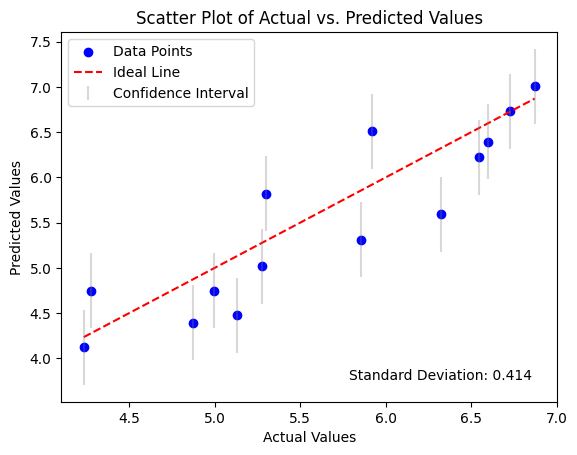

In [ ]:
y_test_scatter_nn = y_test.detach().numpy().reshape(-1)
y_pred_scatter_nn = model3_pred_test.detach().numpy().reshape(-1)

# Calculate residuals (prediction errors)
residuals = y_test_scatter_nn - y_pred_scatter_nn

# Calculate standard deviation of residuals
std_dev = np.std(residuals)

plt.scatter(y_test_scatter_nn, y_pred_scatter_nn, c='b', label='Data Points')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Actual vs. Predicted Values')

plt.plot([min(y_test_scatter_nn), max(y_test_scatter_nn)], [min(y_test_scatter_nn), max(y_test_scatter_nn)], 'r--', label='Ideal Line')
plt.errorbar(y_test_scatter_nn, y_pred_scatter_nn, yerr=std_dev, fmt='none', color='gray', alpha=0.3, label='Confidence Interval')
plt.text(0.95, 0.05, 'Standard Deviation: {:.3f}'.format(std_dev),
         horizontalalignment='right', verticalalignment='bottom',
         transform=plt.gca().transAxes)

plt.legend()
plt.show()


The blue data points represent the actual happiness scores (y_test) plotted against the predicted happiness scores (y_pred) by the model. Each data point represents a specific country. The closer the data points are to the ideal line (red dashed line), the more accurate the predictions. If the model predictions were perfect, all data points would lie exactly on this line. The gray error bars around the data points represent the confidence interval, which indicates the uncertainty or variability in the predictions. The length of the error bars reflects the standard deviation of the residuals (prediction errors). A larger confidence interval suggests higher uncertainty in the predictions. The standard deviation of the residuals is 0.414. In other words, on average, the predicted happiness scores by the optimized NN model deviate from the actual  values by approximately 0.608 units.

Therefore, in this case, the standard deviation of 0.414 on the 0-10 scale implies that there is a moderately low amount of variability or deviation between the predicted and actual happiness scores.

Let's compare the scatter plot of our best model with our worst model to feel the difference.

In [ ]:
y = df['happiness_score']
X = df[['life_expect', 'life_exp60', 'adult_mortality',
       'infant_mort', 'age1-4mort', 'alcohol', 'bmi', 'basic_water',
       'pop_mils', 'development_index', 'gdp_per_capita', 'eco_footprint',
       'biocapacity', 'deficit_or_reserve', 'pf_rol', 'pf_ss', 'pf_movement',
       'pf_religion', 'pf_expression', 'pf_identity', 'pf_score',
       'ef_government', 'ef_legal', 'ef_money', 'ef_trade', 'ef_regulation',
       'ef_score', 'hf_score']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)
scaler = MinMaxScaler()

#Fit the scaler
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# We will use a degree 2
poly = PolynomialFeatures(2)
# Transform our training and test set
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
# Feature name:


model_poly = LinearRegression(fit_intercept=False) # we don't need fit intercept since polynomial features function add a column of ones to the data 

# Fit
model_poly.fit(X_train_poly, y_train)

# Predict:
predictions = model_poly.predict(X_test_poly)
predictions_train = model_poly.predict(X_train_poly)


# Compute the MAE, the MSE and the R^2 on the test set
mae_test = mean_absolute_error(y_test, predictions)
mse_test = mean_squared_error(y_test, predictions)
r2_test = r2_score(y_test, predictions)

# Compute the MAE, the MSE and the R^2 on the training set
mae_train = mean_absolute_error(y_train, predictions_train)
mse_train = mean_squared_error(y_train, predictions_train)
r2_train = r2_score(y_train, predictions_train)

#print(f"MAE test set: {mae:0.2f}; MAE training set: {mae_train:0.2f};")
#print(f"MSE test set: {mse:0.2f}; MSE training set: {mse_train:0.2f};")
#print(f"R\u00b2 test set: {r2:0.2f}; R\u00b2 training set: {r2_tra

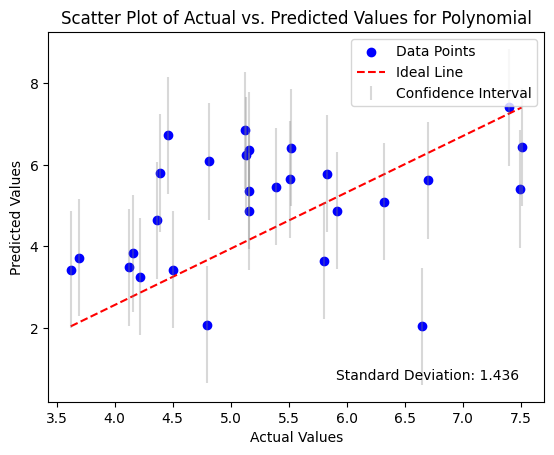

In [ ]:

y_test_scatter_poly = y_test
y_pred_scatter_poly = predictions

# Calculate residuals (prediction errors)
residuals = y_test_scatter_poly - y_pred_scatter_poly

# Calculate standard deviation of residuals
std_dev = np.std(residuals)

plt.scatter(y_test_scatter_poly, y_pred_scatter_poly, c='b', label='Data Points')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Actual vs. Predicted Values for Polynomial')

plt.plot([min(y_test_scatter_poly), max(y_test_scatter_poly)], [min(y_pred_scatter_poly), max(y_pred_scatter_poly)], 'r--', label='Ideal Line')
plt.errorbar(y_test_scatter_poly, y_pred_scatter_poly, yerr=std_dev, fmt='none', color='gray', alpha=0.3, label='Confidence Interval')
plt.text(0.95, 0.05, 'Standard Deviation: {:.3f}'.format(std_dev),
         horizontalalignment='right', verticalalignment='bottom',
         transform=plt.gca().transAxes)

plt.legend()
plt.show()


In the scatter plot of the polynomial model, we can see that some variables are very off the red line which represents perfect predictions. The grey bar that represents the standard deviation is also significantly bigger than for our optimized neural network model. This indicates increased uncertanty in predictions, which can also be seen that the higher value of 1.436.

# RESULTS

In the previous discussion, we explored the impact of parameter tuning and conducted a comprehensive comparison of model performance. Building upon this analysis, we will now proceed to rank the various models employed in our assignment based on the identified metrics.






In our research, our primary aim was to assess the effectiveness of multiple models in predicting happiness levels across various countries using a diverse set of regressors. 





Let's visualize again our results table.

In [ ]:
results

,R2 Training Set,R2 Test Set,MAE Training Set,MAE Test Set,MSE Training Set,MSE Test Set,RMSE Training Set,RMSE Test Set
Model Name,,,,,,,,
Linear Regression,0.8221,0.6731,0.3947,0.5183,0.2264,0.3839,0.4758,0.6196
Polynomial Regression,1.0000,-0.8435,0.0000,1.0762,0.0000,2.1651,0.0000,1.4714
Regression with Lasso regularization,0.8286,0.7371,0.3610,0.4786,0.2182,0.3088,0.4671,0.5557
Regression with Ridge regularization,0.8179,0.7400,0.3816,0.4655,0.2318,0.3053,0.4814,0.5526
Default Gradient Boosting,0.9974,0.6417,0.0446,0.5338,0.0033,0.4208,0.0578,0.6487
Gradient Boosting with Tuned parameters,0.9885,0.6677,0.0972,0.5151,0.0147,0.3903,0.1211,0.6247
Support Vector Regressor,0.8366,0.6804,0.3311,0.5142,0.2080,0.3754,0.4561,0.6127
Support Vector Regression with Tuned Parameters,0.7992,0.7196,0.4138,0.4809,0.2556,0.3294,0.5056,0.5739
Decision tree Regression,1.0000,0.2538,0.0000,0.6419,0.0000,0.8764,0.0000,0.9362


We will be comparing results from different models, hence, relying on the test data for interpretation is crucial as it provides an unbiased evaluation of their performance on unseen data, offering a more realistic representation of their generalization capabilities compared to the training data.






As previously mentioned, we will provide a ranking for each evaluation metric excluding R2, as it has been used only for within model comparison rather than between. in this part, we also be discussing the implications of the model rankings. Additionally, we will consider the tradeoff computational complexity and performance aspects in our discussion.







The Neural Network Optimized approach demonstrates the best performance in terms of MAE, with a remarkably low value of 0.3773. This value implies that, on average, the model's predictions for happiness scores deviate by approximately 0.3773 units from the actual values on a scale of 0 to 10. Following closely, we find the models based on the two regularization techniques Lasso and Ridge, which also exhibit relatively low MAE scores. On the other hand, the Polynomial Regression model yields an exceptionally high MAE value of 1.0762. This indicates that the model's predictions have a substantial average difference from the actual values. Again, the Decision Tree Regression model also exhibits a relatively high MAE score of 0.7549, implying larger discrepancies between predicted and actual values. 

The Neural Network Optimized model achieved the lowest MSE of 0.1883, indicating minimal squared deviations between its predictions and the actual happiness values. The meticulous optimization contributed to its exceptional performance. Other models showed intermediate MSE scores, with Support Vector Regression (0.3294) and Default Random Forest (0.3973) performing moderately well. The Polynomial Regression model had an MSE of 2.1651, while Gradient Boosting with Tuned Parameters (0.3942) and Default Gradient Boosting (0.4227) had relatively lower MSE scores. Despite not being the top performers, these models exhibited relatively low squared differences between predicted and actual values. Lasso and Ridge regularization techniques also demonstrated solid performance.

 
The model achieving the lowest RMSE on the test set is again the Neural Network Optimized, with an value of 0.4340. This indicates that the model's predictions exhibit minimal deviations from the actual happiness values. Similar conclusions as above for LASSO and Ridge. Conversely, the Decision Tree Regression model demonstrates a relatively high RMSE of 0.8530, suggesting larger differences between predicted and actual values. The Support Vector Regression with Tuned Parameters achieves an RMSE of 0.5739, indicating moderate prediction accuracy. Gradient Boosting with Tuned Parameters achieves an RMSE of 0.6278, suggesting relatively accurate predictions, with its default counterpart exhibiting a slightly higher RMSE of 0.6502.


The findings of this study provide valuable insights into the relationship between happiness and sustainability, filling a research gap in the literature. The analysis confirms previous research highlighting the positive correlation between sustainable happiness and the environmental and social dimensions of sustainable development.

# DISCUSSION

We have witnessed the improved performance of NN in the current regression problem. NN models have the ability to capture complex non-linear relationships between input features and target variables. In the context of predicting happiness, there may exist intricate patterns and interactions among various predictors that affect happiness levels. NN models are also capable of automatically extracting relevant features from the input data. This alleviates the need for manual feature engineering, which can be a challenging and time-consuming process. NN models can effectively capture important patterns and representations that contribute to predicting happiness. 

Furthermore, it is noteworthy that the Lasso and Ridge regularization techniques, known for their simplicity of implementation, exhibited the second and third lowest errors among all the metrics examined. This finding is encouraging as it indicates their suitability for addressing the research question at hand without requiring advanced machine learning expertise to deploy.

In this study, NN models demonstrated relatively shorter training and running times compared to other complex models. This advantage makes NN models an optimal choice for predicting happiness levels. The reduced training time allows future researchers to efficiently iterate and experiment with different model architectures, hyperparameters, and data preprocessing techniques to enhance performance. Moreover, the faster running time of NN models is advantageous for real-time or near real-time applications that require prompt predictions. For instance, policymakers or organizations seeking timely insights into happiness levels can benefit from the quicker inference speed of NN models, enabling them to make informed decisions in a timely manner.

We should acknowledge that the dataset used in our study was relatively small, and it did not suffer from the problem of high dimensionality. The limited number of features in the dataset may have contributed to the efficient training and running time of the Neural Network (NN) models. Also, it was relatively clean, with no missing data.

As the size of the dataset increases, with a larger number of features and potentially more complex relationships to capture, the training and running time of NN models may be affected. Dealing with larger datasets poses challenges in terms of computational resources and the scalability of NN models. The increased dimensionality can lead to longer training times and higher computational requirements, which should be considered when applying NN models to larger and more complex datasets.

Therefore, it is important for further research to explore the performance of the NN model tested in this paper on larger datasets with a higher number of parameters. Testing the models on datasets with more features and potentially longitudinal data can provide insights into the scalability and robustness of NN models.

# CONCLUSIONS

In the present study, we conducted an exploratory data analysis comprising data visualization, clustering, and regression analysis to examine the intricate relationship between environmental footprint, happiness, and geography. Clustering techniques were employed to categorize countries based on their happiness and ecological scores, and we said we preffered the results of KMeans, resulting in the identification of five distinct clusters. We contend that these clusters offer a more nuanced representation of the multifaceted dynamics encompassing environmental impact, happiness levels, and geographical factors.

Subsequently, a comprehensive assessment of various regression algorithms was performed to model the prediction of happiness scores using our dataset. Notably, a NN we built demonstrated exceptional performance in accurately forecasting happiness scores. Diverse configurations of the many regression models were tested by incorporating regularization techniques such as Lasso, Ridge, and Grid search. We were also positively impressed by the solid performance of these two regularization techniques in the current application, also in comparison to more advanced nonparametric models. The computational runtime for model fitting was consistently manageable throughout the analysis, with the longest duration observed for the Lasso, Gradient Boosting Regression (GBR), and Random Forest algorithms. This outcome can be attributed, in part, to the relatively small size of our dataset. Consequently, when applying our analysis to larger datasets, researchers may encounter divergent outcomes or face the challenge of balancing performance and computational complexity. Future research should explore the performance of NN models on larger datasets with more features, enabling a more comprehensive understanding of their scalability and robustness.

Nonetheless, our findings have significant implications for future researchers, who can leverage this study as a foundation for further investigations in understanding the intricate relationship between environmental sustainability, happiness, and predictive modeling.

 Our study on predicting happiness levels using various regression models builds upon the importance of understanding the factors that contribute to happiness and well-being across countries and offers insights into the effectiveness of different approaches in capturing the complex relationships between predictors and happiness. The scalability and efficiency of NN models make them an optimal choice for predicting happiness, offering policymakers timely insights into happiness levels for informed decision-making. However, it is crucial to consider the limitations of our study, such as the small dataset size and limited dimensionality.  By connecting our findings with the United Nations' Sustainable Development Goals, we highlight the relevance of investing in social welfare programs to promote happiness and well-being, contributing to evidence-based decision-making and interventions that foster sustainable development and societal well-being.





# References

Aksoy, F., & Arlı, N. B. (2019). Evaluation of sustainable happiness with Sustainable Development Goals: Structural equation model approach. Sustainable Development, 27(6), 1362-1373. https://doi.org/10.1002/sd.1985

Aman, J., Abbas, J., Nurunnabi, M., & Bano, S. (2019). The relationship of religiosity and marital satisfaction: The role of religious commitment and practices on marital satisfaction among Pakistani respondents. Behavioral Sciences, 9(3), 30Return to ref 2019 in article.

Beimer, J., & Francike, M. (2019). Out-of-Sample House Price Prediction by Hedonic Price Models and Machine Learning Algorithms.

Chen, C. W. (2023). Can smart cities bring happiness to promote sustainable development? Contexts and clues of subjective well-being and urban livability. Developments in the Built Environment, 13, 100108.

Dietz, T., & Jorgenson, A. K. (2014). Towards a new view of sustainable development: Human well-being and environmental stress. Environmental Research Letters, 9(3), 031001.

Di Fabio, A., & Kenny, M. E. (2018). Academic relational civility as a key resource for sustaining well-being. Sustainability, 10(6), 1914.

Di Martino, S., & Prilleltensky, I. (2020). Happiness as fairness: The relationship between national life satisfaction and social justice in EU countries. Journal of community psychology, 48(6), 1997-2012.

Dismuke, C., & Lindrooth, R. (2006). Ordinary least squares. Methods and Designs for Outcomes Research, 93, 93-104.

Hellström, E., Hämäläinen, T., Lahti, V. M., Cook, J. W., & Jousilahti, J. (2015). Towards a sustainable well-being society: From principles to applications. Version 2.0. Sitra Working Paper 1.4. 2015. 35.

Iriarte, L. (2022). Are the Sustainable Development Goals the Compass for a Happier Society?. Linking Sustainability and Happiness: Theoretical and Applied Perspectives, 103-111.

Khatri S. (2017). Report: Qatar has the world’s second largest eco footprint. Medium. https://medium.com/dohanews/report-qatar-has-the-worlds-second-largest-eco-footprint-c880a38dbb53

Müller, A. C., Guido, S. (2017). Introduction to Machine Learning with Python.

OpenAI. (2021). ChatGPT (Version 3.5) [Computer software]. https://github.com/openai/chatgpt


Sameer, Y. M., Elmassah, S., Mertzanis, C., & El-Maghraby, L. (2021). Are happier nations more responsible? Examining the link between happiness and sustainability. Social Indicators Research, 158(1), 267-295.

Smola, A. J., & Schölkopf, B. (2004). A tutorial on support vector regression. Statistics and computing, 14(3), 199-222.

Wikipedia A, (2023). List of countries by ecological footprint. https://en.wikipedia.org/wiki/List_of_countries_by_ecological_footprint

World Happiness Report. (2023). World Happiness Report 2023. Sustainable Development Solutions Network. https://happiness-report.s3.amazonaws.com/2023/WHR+23.pdf






## STREAMLIT

In [ ]:
st.write("""
# Happiness Prediction App

This app predicts the **Happiness** of a country!
""")

st.sidebar.header('User Input Parameters')

DeltaGenerator(_root_container=1, _parent=DeltaGenerator())

In [ ]:
# Add the 'country' column from df to df_nn
df_nn['country'] = df['country']

# Add the 'iso3' column from df to df_nn
df_nn['iso3'] = df['iso3']

In [ ]:
st.subheader('User Input parameters')
st.write(df_nn)

In [ ]:
torch.save(model_nn3.state_dict(), 'model_nn3.pth')

In [ ]:
# Instantiate the model
model_nn3 = Net(D_in, 14, D_out)

# Load the saved model's state_dict
model_nn3.load_state_dict(torch.load('model_nn3.pth'))

# Set the model to evaluation mode
model_nn3.eval()


Net(
  (linear1): Linear(in_features=28, out_features=14, bias=True)
  (linear2): Linear(in_features=14, out_features=1, bias=True)
  (activation): ReLU()
)

In [ ]:
# Get user input
user_country = st.text_input("Enter country name:")

input_array = df_nn.values  # Assuming df_nn is a DataFrame
input_tensor = torch.Tensor(input_array)

# Set the model to evaluation mode
model_nn3.eval()

# Disable gradient computation for faster inference
with torch.no_grad():
    # Make predictions using the model
    prediction = model_nn3(input_tensor)

# Get the predicted happiness score (assuming it is a single value)
predicted_score = prediction.item()

# Display the prediction
st.write(f"The happiness score for {user_input} is: {predicted_score}")

TypeError: ignored

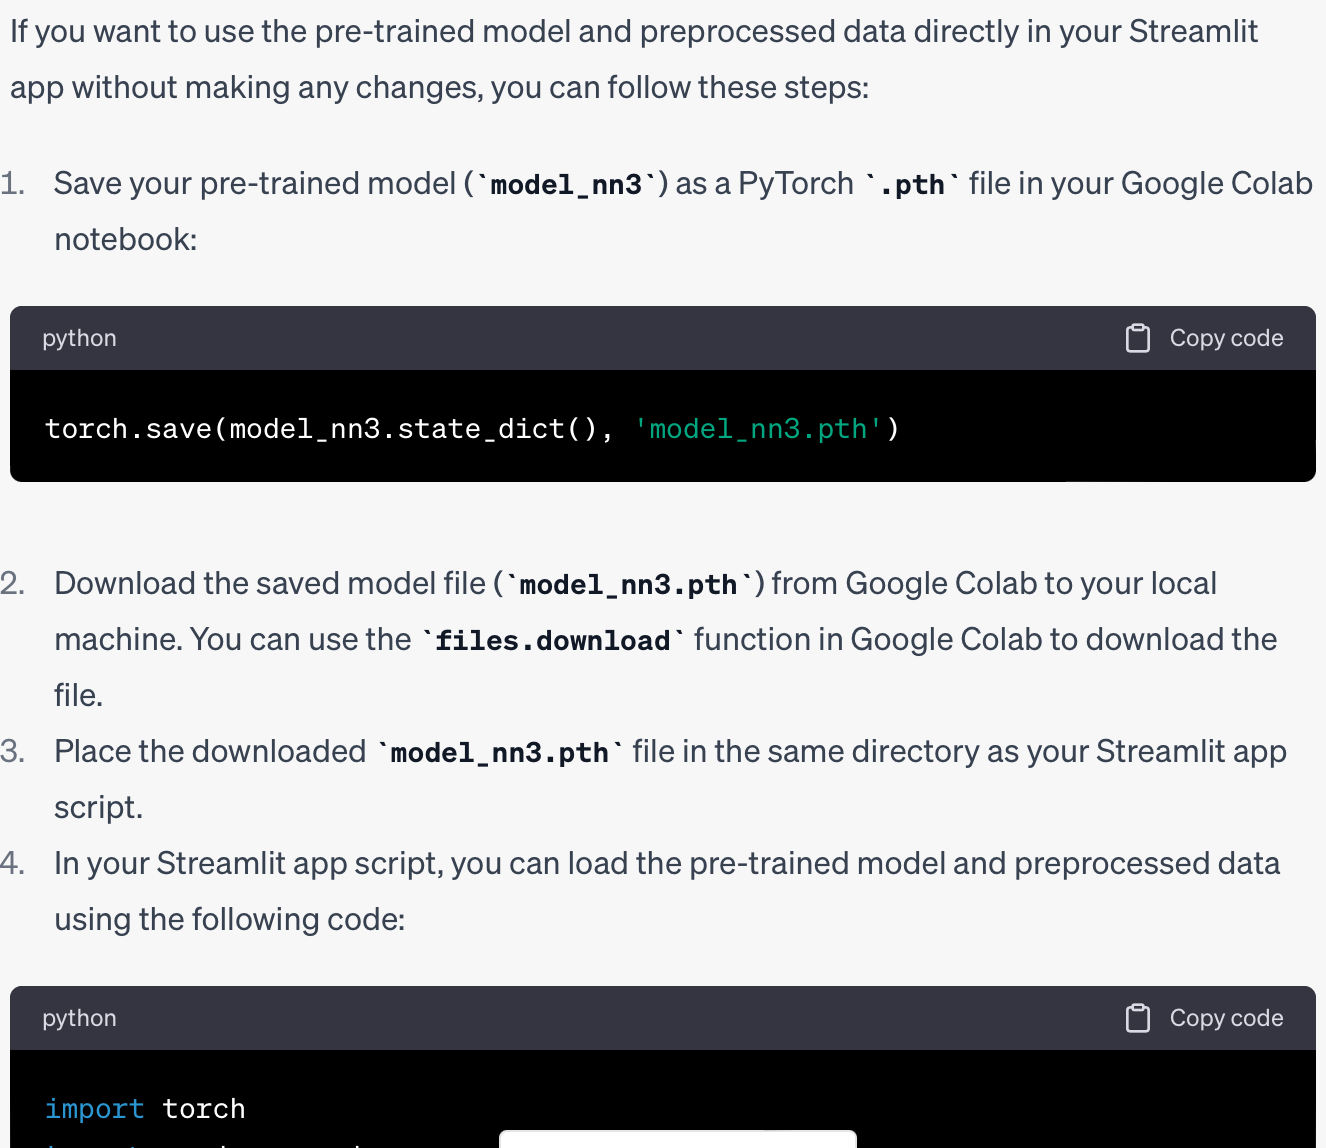

In [ ]:
'life_expect', 'life_exp60', 'adult_mortality', 'infant_mort', 'age1-4mort', 
                            'alcohol', 'bmi', 'basic_water', 'pop_mils', 'development_index', 'gdp_per_capita', 
                            'eco_footprint', 'biocapacity', 'deficit_or_reserve', 'pf_rol', 'pf_ss', 'pf_movement',
                            'pf_religion', 'pf_expression', 'pf_identity', 'pf_score', 'ef_government', 'ef_legal', 
                            'ef_money', 'ef_trade', 'ef_regulation', 'ef_score', 'hf_score', 'happiness_score'